In [1]:
from Vissim_env_class import environment
from Actor_critic_class import ACAgent
from MasterAC_Agent import MasterAC_Agent
from MasterDQN_Agent import MasterDQN_Agent

# Network Specific Libraries
from Balance_Functions import balance_dictionary

# General Libraries
import numpy as np 
import pylab as plt
import os
import csv
import pandas as pd
import json

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Balance

In [ ]:
model_name  = 'Balance'
#vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
vissim_working_directory = "E:\Backup - Onedrive\Desktop\ATI\0_TMF\MLforFlowOptimisation\Vissim"
sim_length = 1800

# all controller actions
Balance_dictionary =\
{\
    # Controller Number 2 
    0 : {'compatible_actions' : {   0 : [1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0],
                                    1 : [0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1],
                                    2 : [0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0] },
         
         'link' : [2, 40, 7, 38],
         'lane' : ['2-1', '2-2', '2-3', '40-1', '7-1', '7-2', '7-3', '38-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [8],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
         
         
        },
    # Controller Number 3
    1 : {'compatible_actions' : {   0 : [0, 1, 0, 0, 1, 0, 1, 1],
                                    1 : [1, 0, 0, 1, 0, 0, 0, 0],
                                    2 : [0, 0, 1, 0, 0, 1, 0, 0] },
         
         'link' : [5, 48, 70, 46],
         'lane' : ['5-1', '5-2', '5-3', '48-1', '70-1', '70-2', '70-3', '46-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [8],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller Number 4
    2 : {'compatible_actions' : {   0 : [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                    1 : [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                                    2 : [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                                    3 : [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]},
         
         'link' : [73, 100, 84, 95],
         'lane' : ['73-1', '73-2', '73-3', '100-1', '100-2', '100-3', '100-4',\
                  '84-1', '84-2', '84-3', '95-1', '95-2', '95-3', '95-4'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [14],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller Number 5
    3 : {'compatible_actions' : {   0 : [0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0],
                                    1 : [1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0],
                                    2 : [0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1]},
         
         'link' : [87, 36, 10, 34],
         'lane' : ['87-1', '87-2', '87-3', '36-1', '10-1', '10-2', '10-3', '34-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [8],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller Number 6 
    4 : {'compatible_actions' : {   0 : [0, 1, 1, 0, 0],
                                    1 : [1, 1, 0, 0, 0],
                                    2 : [0, 0, 0, 1, 0]},
         'link' : [8, 24, 13],
         'lane' : ['8-1', '8-2', '24-1', '13-1', '13-2', '13-3'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [6],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller Number 8
    5 : {'compatible_actions' : {   0 : [1, 0, 1, 0, 1, 0],
                                    1 : [0, 1, 0, 1, 0, 1]},
         'link' : [26, 23, 35],
         'lane' : ['26-1', '23-1', '35-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [3],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
         
        },
    # Controller Number 9
    6 : {'compatible_actions' : {   0 : [0, 1, 0, 1, 1, 1],
                                    1 : [1, 0, 1, 0, 0, 0]},
         'link' : [51, 92, 64, 19],
         'lane' : ['51-1', '92-1', '92-2', '64-1', '19-1', '19-2'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [6],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Contoller Number 10
    7 : {'compatible_actions' : {   0 : [0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
                                    1 : [0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
                                    2 : [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]},
         'link' : [18, 66, 16],
         'lane' : ['18-1', '18-2', '18-3', '66-1', '16-1', '16-2', '16-3'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [7],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller Number 12
    8 : {'compatible_actions' : {   0 : [1, 0, 1, 0, 0, 0, 0],
                                    1 : [0, 1, 0, 0, 0, 0, 0]},
         'link' : [62, 45, 44],
         'lane' : ['62-1', '45-1', '44-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [3],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller Number 13
    9 : {'compatible_actions' : {   0 : [0, 1, 0, 1, 1, 0, 1, 0],
                                    1 : [1, 0, 1, 0, 0, 1, 0, 1]},
         'link' : [60, 43, 55, 58],
         'lane' : ['60-1', '43-1', '55-1', '58-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [4],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
            
        },
    # Controller 15
    10 : {'compatible_actions' : {  0 : [1, 0, 1, 0, 0, 1, 0, 1],
                                    1 : [0, 1, 0, 1, 1, 0, 1, 0]},
         'link' : [32, 42, 30, 39],
         'lane' : ['32-1', '42-1', '30-1', '39-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [4],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller 16
    11 : {'compatible_actions' :  { 0 : [1, 0, 1, 0, 0, 1, 0, 1],
                                    1 : [0, 1, 0, 1, 1, 0, 1, 0]},
         'link' : [29, 50, 28, 47],
         'lane' : ['29-1', '50-1', '28-1', '47-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [4],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        },
    # Controller 17
    12 : {'compatible_actions' :  { 0 : [1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1],
                                    1 : [0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1],
                                    2 : [0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0],
                                    3 : [0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0]},
         'link' : [27, 22, 25, 77],
         'lane' : ['27-1', '22-1', '22-2', '22-3', '25-1', '77-1', '77-2'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [7],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
            
        },
    # Controller 33 
    13 : {'compatible_actions' :  { 0 : [1, 0, 0, 1, 0, 0, 1, 0, 0],
                                    1 : [0, 0, 1, 1, 0, 1, 0, 0, 0],
                                    2 : [0, 1, 0, 0, 1, 1, 0, 1, 1]},
         'link' : [68, 71, 75],
         'lane' : ['68-1', '68-2', '68-3', '71-1', '71-2', '75-1'],
         
         'controled_by_com' : True,
         'green_time' : 8,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [6],
         'state_type' : 'Queues',
         'reward_type' : 'Queues'
        }
}

In [ ]:
env = environment(model_name, vissim_working_directory, sim_length, Balance_dictionary,\
            timesteps_per_second = 1, mode = 'training', delete_results = True, verbose = True)

In [ ]:
env.SCUs

In [ ]:
env.SCUs[0].state

In [ ]:
#env.reset()

In [ ]:
actions = dict()
for i in range(len(env.SCUs)):
    actions[i]=0
    
print(actions)

In [ ]:
class Cyclic_Control():
    def __init__(self,size):
        self.action = 0
        self.size = size
        
    def choose_action(self,state=None):
        self.action = (self.action + 1) % self.size
        return self.action
CC = [] 

for idx, info in Balance_dictionary.items():
        cycle_size = len(info['compatible_actions'])
        CC.append(Cyclic_Control(cycle_size))

In [ ]:
start_state = env.get_state()
for idx, s in start_state.items():
    actions[idx] = CC[idx].choose_action(s)
    
for _ in range(10000):
    action_required, SARSDs = env.step(actions)
    if action_required : 
        actions = dict()
        for idx , sarsd in SARSDs.items():
            s,a,r,ns,d = sarsd
            #print(sarsd)
            
            # in order to find the next action you need to evaluate the "next_state" because it is the current state of the simulator
            actions[idx] = CC[idx].choose_action(ns)
        
    if env.done :
        env.reset()
        for idx, s in start_state.items():
            actions[idx] = CC[idx].choose_action(ns)
        
        

# Balance RL AC

In [ ]:
model_name  = 'Balance'
vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
sim_length = 1800
agent_type = 'AC'

# all controller actions
Balance_dictionary = balance_dictionary(agent_type)


In [ ]:
env = environment(model_name, vissim_working_directory, sim_length, Balance_dictionary,\
            timesteps_per_second = 1, mode = 'training', delete_results = True, verbose = True)

In [ ]:

# Agent hyperparameters
gamma = 0.85
alpha = 0.0005
value = 25
entropy = 5000
n_step_size = 11
reduce_entropy_every = 1000
entropy_threshold = 0.5
timesteps_per_second = 1


# for the monitoring only for AC
horizon = 50
n_sample = 10

Balance_MultiAc_Agents = MasterAC_Agent(model_name, vissim_working_directory, sim_length, Balance_dictionary, n_step_size, gamma, alpha, entropy, value, \
                timesteps_per_second = timesteps_per_second, verbose = True, horizon = 100, \
                n_sample = 10)


In [ ]:
Balance_MultiAc_Agents.train(1000)

Balance_MultiAc_Agents.save()

In [ ]:
Balance_MultiAc_Agents = MasterAC_Agent(model_name, vissim_working_directory, sim_length, Balance_dictionary, n_step_size, gamma, alpha, entropy, value, \
                timesteps_per_second = timesteps_per_second, verbose = True, horizon = 100, \
                n_sample = 10)

Balance_MultiAc_Agents.load(best = False)

In [ ]:
Agents = []
for idx, info in Balance_dictionary['junctions'].items():
        acts = info['compatible_actions']
        Agent = ACAgent(info['state_size'], len(acts), idx, n_step_size, gamma, alpha, entropy, value)
        Agents.append(Agent)

In [ ]:
start_state = env.get_state()
actions = {}
for idx, s in start_state.items():
            actions[idx] = int(Agents[idx].choose_action(s))

for i in range(30000):
    action_required, SARSDs = env.step_to_next_action(actions)
    if action_required : 
        actions = dict()
        for idx , sarsd in SARSDs.items():
            s,a,r,ns,d = sarsd
            
            #print(sarsd)
            Agents[idx].remember(s,a,r,ns,d)
            if len(Agents[idx].memory) >= Agents[idx].n_step_size :
                Agents[idx].learn() 
            
            # in order to find the next action you need to evaluate the "next_state" because it is the current state of the simulator
            actions[idx] = int(Agents[idx].choose_action(ns))
            #print(actions)
            
            if (i+1)%reduce_entropy_every == 0:
                if Agents[idx].params['entropy'] >= entropy_threshold :
                    Agents[idx].reduce_entropy()
                    print ("Agent {} : Entropy reduced to {} " .format(idx, Agents[idx].params['entropy']))
        
    # For the saving , monitoring of the agent 
    if env.done :
        env.reset()
        
        
        # Only for AC
        for idx, agent in enumerate(Agents):
            predicted_values, true_values, proba0, probas = agent.value_check(horizon, n_sample)
            print ("Agent {} : Predicted Values and True Return : \n {} \n {}" .format(idx, predicted_values, true_values))
            print ("Agent {} : Proba distribution on those states : \n {}" .format(idx, probas))
            print ("Agent {} : Proba distribution on the 0 state : \n {}" .format(idx, proba0))
            agent.reset()
                    
        
        for idx, s in start_state.items():
            actions[idx] = Agents[idx].choose_action(s)

In [ ]:
env.reset()

# Balance RL DQN Partial Training

In [2]:
intersection = 6
map_name  = 'Balance_int'+str(intersection)
model_name = map_name
#vissim_working_directory = 'C:\\Users\\acabrejasegea\\OneDrive - The Alan Turing Institute\\Desktop\\ATI\\0_TMF\\MLforFlowOptimisation\\Vissim\\'
vissim_working_directory = "E:\\OneDrive - University of Warwick\\Desktop\\ATI\\0_TMF\\MLforFlowOptimisation\\Vissim"

## Simulation Parameters
Random_Seed = 42
sim_length = 9001
timesteps_per_second = 1
agent_type = "DDQN"
actions = 'default_actions'     # 'default_actions' or 'all_actions'

## DQN Hyperaramenters
episodes = 500
copy_weights_frequency = 10

PER_activated = True
memory_size = 5000
batch_size = 128
batches_per_episode = 10

alpha = 0.00005
gamma = 0.95

# Load and partition balance dictionary
Balance_dictionary = balance_dictionary(agent_type)
if intersection == "1_2_4":
    intersection = 1
elif intersection == "11_12":
    intersection = 11
partial_dictionary = {"junctions": { (intersection-1) : Balance_dictionary["junctions"][intersection-1]},\
                      "demand": Balance_dictionary["demand"]}

Session_ID = map_name + "_" + actions + "_" + str(episodes) + "_" + str(sim_length-1) + "_" + agent_type
print("Current simulation: {}".format(Session_ID))

Current simulation: Balance_int6_default_actions_500_9000_DDQN


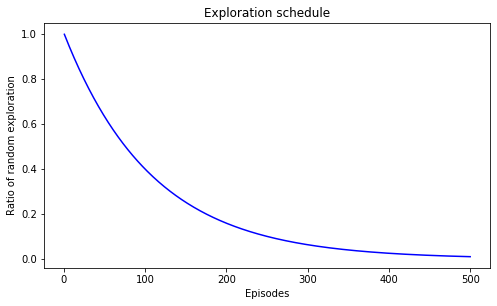

In [3]:
# Exploration Schedule ("linear" or "geometric")
exploration_schedule = "geometric"
epsilon_start = 1
epsilon_end   = 0.01

def choose_schedule(exploration_schedule, espilon_start, epsilon_end, episodes):
    if exploration_schedule == "linear":
        epsilon_decay = 1.2*(epsilon_end - epsilon_start)/(episodes-1)
        epsilon_sequence = [1 + epsilon_decay * entry for entry in range(episodes+1)]
        epsilon_sequence = [0.01 if entry < 0.01 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "geometric":
        epsilon_decay = np.power(epsilon_end/epsilon_start, 1./(episodes-1)) # Geometric decay
        epsilon_sequence = [epsilon_start * epsilon_decay ** entry for entry in range(episodes+1)]
        epsilon_sequence = [0.01 if entry < 0.01 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "entropy":
        pass
    else:
        print("ERROR: Unrecognized choice of exploration schedule.")
        
    # Plotting exploration schedule
    plt.figure(figsize=(8,4.5))
    x_series = np.array(range(1,episodes+1))
    y_series = epsilon_sequence[0:episodes]
    plt.plot(x_series, y_series, '-b')
    plt.xlabel('Episodes')
    plt.ylabel('Ratio of random exploration')
    plt.title('Exploration schedule')
    plt.show()
    return(epsilon_sequence)

epsilon_sequence = choose_schedule(exploration_schedule, epsilon_start, epsilon_end, episodes)


In [4]:
Balance_int_MultiDQN_Agents = MasterDQN_Agent(model_name, vissim_working_directory, sim_length, partial_dictionary,\
                gamma, alpha, agent_type, memory_size, PER_activated, batch_size, batches_per_episode, copy_weights_frequency, epsilon_sequence,\
                Random_Seed, timesteps_per_second, Session_ID, verbose = True)

INTERSECTION 5: SETTING UP AGENT
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3)]               0         
_________________________________________________________________
dense (Dense)                (None, 48)                192       
_________________________________________________________________
dense_1 (Dense)              (None, 48)                2352      
_________________________________________________________________
dense_2 (Dense)              (None, 48)                2352      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 98        
Total params: 4,994
Trainable params: 4,994
Non-trainable params: 0
________________________________________

In [5]:
Balance_int_MultiDQN_Agents.prepopulate_memory()

Experience file not found. Generating now...
Working Directory set to: E:\OneDrive - University of Warwick\Desktop\ATI\0_TMF\MLforFlowOptimisation\Vissim
Generating Cache...
Cache generated.

****************************
*   COM Server dispatched  *
****************************

Attempting to load Model File: Balance_int6.inpx ...
Model File load process successful.
Simulation length set to 9001 seconds.
Results from Previous Simulations: Deleted. Fresh Start Available.
Fetched and containerized Network Object 

*******************************************************
*                                                     *
*                COM SETUP COMPLETE                   *
*                                                     *
*******************************************************

Random seed set in simulator. Random Seed = 42
Deploying Network Parser...
Successful Network Crawl: Identified SignalControllers, Links, Lanes and Vehicle Inputs.

Setting Simulation mode to: training

In [6]:
Balance_int_MultiDQN_Agents.train(episodes)

Working Directory set to: E:\OneDrive - University of Warwick\Desktop\ATI\0_TMF\MLforFlowOptimisation\Vissim
Generating Cache...
Cache generated.

****************************
*   COM Server dispatched  *
****************************

Attempting to load Model File: Balance_int6.inpx ...
Model File load process successful.
Simulation length set to 9001 seconds.
Results from Previous Simulations: Deleted. Fresh Start Available.
Fetched and containerized Network Object 

*******************************************************
*                                                     *
*                COM SETUP COMPLETE                   *
*                                                     *
*******************************************************

Random seed set in simulator. Random Seed = 42
Deploying Network Parser...
Successful Network Crawl: Identified SignalControllers, Links, Lanes and Vehicle Inputs.

Setting Simulation mode to: training
Starting Deployments of Signal Control Units

128/128 - 0s - loss: 161.0164
128/128 - 0s - loss: 127.7057
128/128 - 0s - loss: 103.3839
128/128 - 0s - loss: 125.3053
128/128 - 0s - loss: 198.0132
128/128 - 0s - loss: 134.7976
128/128 - 0s - loss: 111.8391
Reducing exploration for all agents to 0.8627

Episode 17: Starting computation.
Episode 17: Finished running.
Agent 0, Average Reward: -8.65
128/128 - 0s - loss: 151.3774
128/128 - 0s - loss: 107.3235
128/128 - 0s - loss: 173.8662
128/128 - 0s - loss: 126.9595
128/128 - 0s - loss: 163.9133
128/128 - 0s - loss: 151.8350
128/128 - 0s - loss: 158.8318
128/128 - 0s - loss: 153.3171
128/128 - 0s - loss: 142.1990
128/128 - 0s - loss: 147.1941
Reducing exploration for all agents to 0.8548

Episode 18: Starting computation.
Episode 18: Finished running.
Agent 0, Average Reward: -8.68
128/128 - 0s - loss: 140.2261
128/128 - 0s - loss: 221.1133
128/128 - 0s - loss: 167.3405
128/128 - 0s - loss: 126.1693
128/128 - 0s - loss: 107.8695
128/128 - 0s - loss: 95.0507
128/128 - 0s - loss: 117.30

128/128 - 0s - loss: 120.0492
128/128 - 0s - loss: 94.3190
Reducing exploration for all agents to 0.7375

Episode 34: Starting computation.
Episode 34: Finished running.
Agent 0, Average Reward: -7.53
128/128 - 0s - loss: 119.2492
128/128 - 0s - loss: 118.2586
128/128 - 0s - loss: 70.5919
128/128 - 0s - loss: 144.8651
128/128 - 0s - loss: 82.4978
128/128 - 0s - loss: 93.5160
128/128 - 0s - loss: 86.2250
128/128 - 0s - loss: 172.9013
128/128 - 0s - loss: 82.6442
128/128 - 0s - loss: 107.4344
Reducing exploration for all agents to 0.7307

Episode 35: Starting computation.
Episode 35: Finished running.
Agent 0, Average Reward: -6.98
Saving architecture, weights, optimizer state for best agent-5
128/128 - 0s - loss: 155.9068
128/128 - 0s - loss: 94.0476
128/128 - 0s - loss: 134.0992
128/128 - 0s - loss: 127.2120
128/128 - 0s - loss: 102.3048
128/128 - 0s - loss: 118.3888
128/128 - 0s - loss: 91.1848
128/128 - 0s - loss: 100.6960
128/128 - 0s - loss: 72.3242
128/128 - 0s - loss: 95.1212
Red

128/128 - 0s - loss: 68.7094
128/128 - 0s - loss: 78.4617
128/128 - 0s - loss: 153.2960
128/128 - 0s - loss: 91.6390
128/128 - 0s - loss: 83.4796
Reducing exploration for all agents to 0.6246

Episode 52: Starting computation.
Episode 52: Finished running.
Agent 0, Average Reward: -6.84
128/128 - 0s - loss: 75.7400
128/128 - 0s - loss: 107.2071
128/128 - 0s - loss: 91.5638
128/128 - 0s - loss: 85.1642
128/128 - 0s - loss: 66.9399
128/128 - 0s - loss: 79.1238
128/128 - 0s - loss: 78.0309
128/128 - 0s - loss: 64.9302
128/128 - 0s - loss: 85.2505
128/128 - 0s - loss: 93.3284
Reducing exploration for all agents to 0.6188

Episode 53: Starting computation.
Episode 53: Finished running.
Agent 0, Average Reward: -7.05
128/128 - 0s - loss: 93.8651
128/128 - 0s - loss: 83.8210
128/128 - 0s - loss: 90.9223
128/128 - 0s - loss: 88.3817
128/128 - 0s - loss: 64.4618
128/128 - 0s - loss: 90.9949
128/128 - 0s - loss: 55.3585
128/128 - 0s - loss: 107.7983
128/128 - 0s - loss: 70.6862
128/128 - 0s - lo

128/128 - 0s - loss: 38.5693
128/128 - 0s - loss: 72.1029
128/128 - 0s - loss: 57.2688
128/128 - 0s - loss: 35.3625
128/128 - 0s - loss: 48.5924
Reducing exploration for all agents to 0.529

Episode 70: Starting computation.
Episode 70: Finished running.
Agent 0, Average Reward: -6.07
128/128 - 0s - loss: 56.8524
128/128 - 0s - loss: 49.6901
128/128 - 0s - loss: 49.2175
128/128 - 0s - loss: 39.2220
128/128 - 0s - loss: 32.5300
128/128 - 0s - loss: 34.6764
128/128 - 0s - loss: 64.3733
128/128 - 0s - loss: 51.1422
128/128 - 0s - loss: 45.4078
128/128 - 0s - loss: 59.7471
Weights succesfully copied to Target model for Agent 5.
Reducing exploration for all agents to 0.5241

Episode 71: Starting computation.
Episode 71: Finished running.
Agent 0, Average Reward: -5.44
128/128 - 0s - loss: 60.6854
128/128 - 0s - loss: 45.3587
128/128 - 0s - loss: 55.3289
128/128 - 0s - loss: 57.6462
128/128 - 0s - loss: 63.3053
128/128 - 0s - loss: 41.7160
128/128 - 0s - loss: 34.7665
128/128 - 0s - loss: 37

128/128 - 0s - loss: 61.9718
128/128 - 0s - loss: 55.3393
Reducing exploration for all agents to 0.448

Episode 88: Starting computation.
Episode 88: Finished running.
Agent 0, Average Reward: -4.05
Saving architecture, weights, optimizer state for best agent-5
128/128 - 0s - loss: 48.9416
128/128 - 0s - loss: 54.3182
128/128 - 0s - loss: 45.1371
128/128 - 0s - loss: 42.1511
128/128 - 0s - loss: 64.5175
128/128 - 0s - loss: 66.4911
128/128 - 0s - loss: 55.8888
128/128 - 0s - loss: 49.0613
128/128 - 0s - loss: 64.8348
128/128 - 0s - loss: 55.7947
Reducing exploration for all agents to 0.4439

Episode 89: Starting computation.
Episode 89: Finished running.
Agent 0, Average Reward: -4.27
128/128 - 0s - loss: 48.7930
128/128 - 0s - loss: 51.9546
128/128 - 0s - loss: 42.1552
128/128 - 0s - loss: 71.3402
128/128 - 0s - loss: 57.6591
128/128 - 0s - loss: 42.3843
128/128 - 0s - loss: 53.9377
128/128 - 0s - loss: 43.4002
128/128 - 0s - loss: 42.3035
128/128 - 0s - loss: 43.0046
Reducing explora

Reducing exploration for all agents to 0.3795

Episode 106: Starting computation.
Episode 106: Finished running.
Agent 0, Average Reward: -4.68
128/128 - 0s - loss: 50.1071
128/128 - 0s - loss: 72.9284
128/128 - 0s - loss: 46.1953
128/128 - 0s - loss: 60.0407
128/128 - 0s - loss: 82.5970
128/128 - 0s - loss: 63.1925
128/128 - 0s - loss: 58.6376
128/128 - 0s - loss: 56.8105
128/128 - 0s - loss: 60.7088
128/128 - 0s - loss: 85.1791
Reducing exploration for all agents to 0.376

Episode 107: Starting computation.
Episode 107: Finished running.
Agent 0, Average Reward: -4.93
128/128 - 0s - loss: 85.1148
128/128 - 0s - loss: 80.7204
128/128 - 0s - loss: 55.0320
128/128 - 0s - loss: 44.4939
128/128 - 0s - loss: 99.3069
128/128 - 0s - loss: 81.7038
128/128 - 0s - loss: 80.4729
128/128 - 0s - loss: 55.4049
128/128 - 0s - loss: 43.0125
128/128 - 0s - loss: 97.0277
Reducing exploration for all agents to 0.3725

Episode 108: Starting computation.
Episode 108: Finished running.
Agent 0, Average Rew

128/128 - 0s - loss: 45.3374
128/128 - 0s - loss: 65.3313
128/128 - 0s - loss: 47.3289
128/128 - 0s - loss: 74.4970
128/128 - 0s - loss: 100.6205
128/128 - 0s - loss: 68.8668
128/128 - 0s - loss: 45.3392
128/128 - 0s - loss: 60.5264
128/128 - 0s - loss: 59.3153
Reducing exploration for all agents to 0.3184

Episode 125: Starting computation.
Episode 125: Finished running.
Agent 0, Average Reward: -4.89
128/128 - 0s - loss: 84.0525
128/128 - 0s - loss: 49.1481
128/128 - 0s - loss: 50.4622
128/128 - 0s - loss: 56.4439
128/128 - 0s - loss: 59.1489
128/128 - 0s - loss: 102.0016
128/128 - 0s - loss: 77.8967
128/128 - 0s - loss: 90.7017
128/128 - 0s - loss: 79.7723
128/128 - 0s - loss: 92.7841
Reducing exploration for all agents to 0.3155

Episode 126: Starting computation.
Episode 126: Finished running.
Agent 0, Average Reward: -3.56
Saving architecture, weights, optimizer state for best agent-5
128/128 - 0s - loss: 66.9661
128/128 - 0s - loss: 64.0010
128/128 - 0s - loss: 84.3975
128/128 -

128/128 - 0s - loss: 76.2419
128/128 - 0s - loss: 87.4801
128/128 - 0s - loss: 98.6364
128/128 - 0s - loss: 74.3529
128/128 - 0s - loss: 78.9725
128/128 - 0s - loss: 100.4143
128/128 - 0s - loss: 100.5073
128/128 - 0s - loss: 87.1001
Reducing exploration for all agents to 0.2697

Episode 143: Starting computation.
Episode 143: Finished running.
Agent 0, Average Reward: -5.46
128/128 - 0s - loss: 83.5580
128/128 - 0s - loss: 80.2297
128/128 - 0s - loss: 58.2533
128/128 - 0s - loss: 109.4117
128/128 - 0s - loss: 109.9676
128/128 - 0s - loss: 71.8839
128/128 - 0s - loss: 113.0101
128/128 - 0s - loss: 79.1096
128/128 - 0s - loss: 79.5875
128/128 - 0s - loss: 73.9551
Reducing exploration for all agents to 0.2672

Episode 144: Starting computation.
Episode 144: Finished running.
Agent 0, Average Reward: -5.45
128/128 - 0s - loss: 98.7614
128/128 - 0s - loss: 69.7681
128/128 - 0s - loss: 85.0081
128/128 - 0s - loss: 90.1236
128/128 - 0s - loss: 99.7904
128/128 - 0s - loss: 94.6174
128/128 - 0

Dumping agent-5 memory into pickle file
Dumping Training Results into pickle file.
Dumping Loss Results into pickle file.
Reducing exploration for all agents to 0.2284

Episode 161: Starting computation.
Episode 161: Finished running.
Agent 0, Average Reward: -4.94
128/128 - 0s - loss: 93.5220
128/128 - 0s - loss: 64.7799
128/128 - 0s - loss: 83.3274
128/128 - 0s - loss: 76.7406
128/128 - 0s - loss: 118.8605
128/128 - 0s - loss: 105.1497
128/128 - 0s - loss: 81.4740
128/128 - 0s - loss: 74.2301
128/128 - 0s - loss: 94.8954
128/128 - 0s - loss: 70.3319
Reducing exploration for all agents to 0.2263

Episode 162: Starting computation.
Episode 162: Finished running.
Agent 0, Average Reward: -5.6
128/128 - 0s - loss: 77.6095
128/128 - 0s - loss: 79.6816
128/128 - 0s - loss: 96.5864
128/128 - 0s - loss: 84.0848
128/128 - 0s - loss: 95.7675
128/128 - 0s - loss: 93.8159
128/128 - 0s - loss: 107.0519
128/128 - 0s - loss: 105.9506
128/128 - 0s - loss: 128.1661
128/128 - 0s - loss: 89.5601
Reduci

128/128 - 0s - loss: 56.7213
128/128 - 0s - loss: 69.1798
128/128 - 0s - loss: 102.4485
128/128 - 0s - loss: 105.4820
128/128 - 0s - loss: 109.9949
128/128 - 0s - loss: 117.0513
128/128 - 0s - loss: 111.0232
128/128 - 0s - loss: 108.4692
128/128 - 0s - loss: 85.9931
Reducing exploration for all agents to 0.1917

Episode 180: Starting computation.
Episode 180: Finished running.
Agent 0, Average Reward: -5.02
128/128 - 0s - loss: 69.3678
128/128 - 0s - loss: 117.1528
128/128 - 0s - loss: 127.6752
128/128 - 0s - loss: 101.8006
128/128 - 0s - loss: 58.2871
128/128 - 0s - loss: 93.8285
128/128 - 0s - loss: 103.0119
128/128 - 0s - loss: 66.7272
128/128 - 0s - loss: 73.5853
128/128 - 0s - loss: 60.1931
Weights succesfully copied to Target model for Agent 5.
Saving architecture, weights and optimizer state for agent-5
Dumping agent-5 memory into pickle file
Dumping Training Results into pickle file.
Dumping Loss Results into pickle file.
Reducing exploration for all agents to 0.1899

Episode 1

128/128 - 0s - loss: 67.8283
128/128 - 0s - loss: 66.9012
128/128 - 0s - loss: 93.8750
128/128 - 0s - loss: 91.2351
128/128 - 0s - loss: 62.7771
128/128 - 0s - loss: 62.0754
Reducing exploration for all agents to 0.1623

Episode 198: Starting computation.
Episode 198: Finished running.
Agent 0, Average Reward: -4.79
128/128 - 0s - loss: 72.6398
128/128 - 0s - loss: 73.7160
128/128 - 0s - loss: 72.3816
128/128 - 0s - loss: 77.4881
128/128 - 0s - loss: 79.2661
128/128 - 0s - loss: 95.9621
128/128 - 0s - loss: 92.9060
128/128 - 0s - loss: 61.5112
128/128 - 0s - loss: 57.0446
128/128 - 0s - loss: 49.9033
Reducing exploration for all agents to 0.1608

Episode 199: Starting computation.
Episode 199: Finished running.
Agent 0, Average Reward: -4.88
128/128 - 0s - loss: 80.7087
128/128 - 0s - loss: 68.1550
128/128 - 0s - loss: 71.7775
128/128 - 0s - loss: 86.1223
128/128 - 0s - loss: 59.3848
128/128 - 0s - loss: 117.7018
128/128 - 0s - loss: 79.7736
128/128 - 0s - loss: 85.5172
128/128 - 0s - 

128/128 - 0s - loss: 67.6043
128/128 - 0s - loss: 54.2821
128/128 - 0s - loss: 73.5079
Reducing exploration for all agents to 0.1375

Episode 216: Starting computation.
Episode 216: Finished running.
Agent 0, Average Reward: -5.22
128/128 - 0s - loss: 66.9765
128/128 - 0s - loss: 52.3500
128/128 - 0s - loss: 63.7819
128/128 - 0s - loss: 62.1888
128/128 - 0s - loss: 70.2462
128/128 - 0s - loss: 75.4478
128/128 - 0s - loss: 61.6917
128/128 - 0s - loss: 64.8922
128/128 - 0s - loss: 68.6770
128/128 - 0s - loss: 56.2821
Reducing exploration for all agents to 0.1362

Episode 217: Starting computation.
Episode 217: Finished running.
Agent 0, Average Reward: -4.45
128/128 - 0s - loss: 72.9176
128/128 - 0s - loss: 78.3899
128/128 - 0s - loss: 56.1403
128/128 - 0s - loss: 74.3101
128/128 - 0s - loss: 68.4016
128/128 - 0s - loss: 71.1378
128/128 - 0s - loss: 66.3596
128/128 - 0s - loss: 67.8048
128/128 - 0s - loss: 56.0411
128/128 - 0s - loss: 58.1187
Reducing exploration for all agents to 0.135


128/128 - 0s - loss: 56.1161
128/128 - 0s - loss: 69.6107
128/128 - 0s - loss: 74.6200
128/128 - 0s - loss: 33.9730
Reducing exploration for all agents to 0.1164

Episode 234: Starting computation.
Episode 234: Finished running.
Agent 0, Average Reward: -3.54
128/128 - 0s - loss: 88.6246
128/128 - 0s - loss: 51.5880
128/128 - 0s - loss: 52.0278
128/128 - 0s - loss: 46.1760
128/128 - 0s - loss: 53.6136
128/128 - 0s - loss: 60.4628
128/128 - 0s - loss: 53.0348
128/128 - 0s - loss: 49.7279
128/128 - 0s - loss: 52.2033
128/128 - 0s - loss: 80.4663
Reducing exploration for all agents to 0.1154

Episode 235: Starting computation.
Episode 235: Finished running.
Agent 0, Average Reward: -3.57
128/128 - 0s - loss: 45.7947
128/128 - 0s - loss: 69.2862
128/128 - 0s - loss: 48.3815
128/128 - 0s - loss: 67.6951
128/128 - 0s - loss: 33.1046
128/128 - 0s - loss: 67.1026
128/128 - 0s - loss: 58.6085
128/128 - 0s - loss: 51.3120
128/128 - 0s - loss: 62.3615
128/128 - 0s - loss: 71.5273
Reducing explora

128/128 - 0s - loss: 54.7146
128/128 - 0s - loss: 31.8980
128/128 - 0s - loss: 65.2321
128/128 - 0s - loss: 79.4715
128/128 - 0s - loss: 36.7703
Reducing exploration for all agents to 0.0986

Episode 252: Starting computation.
Episode 252: Finished running.
Agent 0, Average Reward: -3.43
128/128 - 0s - loss: 54.8364
128/128 - 0s - loss: 64.9022
128/128 - 0s - loss: 45.7556
128/128 - 0s - loss: 34.1952
128/128 - 0s - loss: 42.0838
128/128 - 0s - loss: 44.8911
128/128 - 0s - loss: 43.5737
128/128 - 0s - loss: 47.6515
128/128 - 0s - loss: 38.6633
128/128 - 0s - loss: 46.4891
Reducing exploration for all agents to 0.0977

Episode 253: Starting computation.
Episode 253: Finished running.
Agent 0, Average Reward: -3.52
128/128 - 0s - loss: 33.8267
128/128 - 0s - loss: 40.8474
128/128 - 0s - loss: 67.6255
128/128 - 0s - loss: 60.0793
128/128 - 0s - loss: 27.9167
128/128 - 0s - loss: 46.9631
128/128 - 0s - loss: 54.0938
128/128 - 0s - loss: 65.3554
128/128 - 0s - loss: 47.6376
128/128 - 0s - l

Reducing exploration for all agents to 0.0835

Episode 270: Starting computation.
Episode 270: Finished running.
Agent 0, Average Reward: -5.15
128/128 - 0s - loss: 53.9864
128/128 - 0s - loss: 52.3978
128/128 - 0s - loss: 69.2832
128/128 - 0s - loss: 77.9419
128/128 - 0s - loss: 84.4260
128/128 - 0s - loss: 92.1974
128/128 - 0s - loss: 77.3655
128/128 - 0s - loss: 85.5911
128/128 - 0s - loss: 45.4159
128/128 - 0s - loss: 51.0766
Weights succesfully copied to Target model for Agent 5.
Reducing exploration for all agents to 0.0828

Episode 271: Starting computation.
Episode 271: Finished running.
Agent 0, Average Reward: -5.07
128/128 - 0s - loss: 76.0214
128/128 - 0s - loss: 56.0716
128/128 - 0s - loss: 62.7435
128/128 - 0s - loss: 62.4943
128/128 - 0s - loss: 64.0186
128/128 - 0s - loss: 46.2956
128/128 - 0s - loss: 75.2270
128/128 - 0s - loss: 70.2331
128/128 - 0s - loss: 52.4863
128/128 - 0s - loss: 67.8120
Reducing exploration for all agents to 0.082

Episode 272: Starting computat

128/128 - 0s - loss: 92.6919
128/128 - 0s - loss: 61.5677
128/128 - 0s - loss: 67.9310
128/128 - 0s - loss: 65.7720
128/128 - 0s - loss: 79.3304
128/128 - 0s - loss: 59.3224
128/128 - 0s - loss: 64.5172
128/128 - 0s - loss: 45.2654
128/128 - 0s - loss: 66.3444
Reducing exploration for all agents to 0.0701

Episode 289: Starting computation.
Episode 289: Finished running.
Agent 0, Average Reward: -4.74
128/128 - 0s - loss: 44.4414
128/128 - 0s - loss: 66.9515
128/128 - 0s - loss: 94.1649
128/128 - 0s - loss: 64.2936
128/128 - 0s - loss: 62.1760
128/128 - 0s - loss: 71.4275
128/128 - 0s - loss: 68.1300
128/128 - 0s - loss: 79.0723
128/128 - 0s - loss: 69.3769
128/128 - 0s - loss: 82.2068
Reducing exploration for all agents to 0.0695

Episode 290: Starting computation.
Episode 290: Finished running.
Agent 0, Average Reward: -4.55
128/128 - 0s - loss: 52.2610
128/128 - 0s - loss: 67.0379
128/128 - 0s - loss: 51.9039
128/128 - 0s - loss: 53.4380
128/128 - 0s - loss: 51.2115
128/128 - 0s - l

128/128 - 0s - loss: 65.6373
128/128 - 0s - loss: 96.8232
128/128 - 0s - loss: 91.2288
128/128 - 0s - loss: 48.9298
128/128 - 0s - loss: 74.1278
128/128 - 0s - loss: 54.4069
Reducing exploration for all agents to 0.0594

Episode 307: Starting computation.
Episode 307: Finished running.
Agent 0, Average Reward: -4.71
128/128 - 0s - loss: 56.8714
128/128 - 0s - loss: 52.3811
128/128 - 0s - loss: 62.9048
128/128 - 0s - loss: 94.9288
128/128 - 0s - loss: 66.5132
128/128 - 0s - loss: 95.6551
128/128 - 0s - loss: 97.0070
128/128 - 0s - loss: 66.7649
128/128 - 0s - loss: 79.8138
128/128 - 0s - loss: 98.9460
Reducing exploration for all agents to 0.0588

Episode 308: Starting computation.
Episode 308: Finished running.
Agent 0, Average Reward: -4.53
128/128 - 0s - loss: 59.4741
128/128 - 0s - loss: 65.4974
128/128 - 0s - loss: 55.8826
128/128 - 0s - loss: 73.5869
128/128 - 0s - loss: 42.0173
128/128 - 0s - loss: 99.9515
128/128 - 0s - loss: 54.5469
128/128 - 0s - loss: 75.2601
128/128 - 0s - l

128/128 - 0s - loss: 51.2375
128/128 - 0s - loss: 35.3637
128/128 - 0s - loss: 58.6265
Reducing exploration for all agents to 0.0503

Episode 325: Starting computation.
Episode 325: Finished running.
Agent 0, Average Reward: -4.69
128/128 - 0s - loss: 60.2188
128/128 - 0s - loss: 114.1570
128/128 - 0s - loss: 73.8405
128/128 - 0s - loss: 67.3048
128/128 - 0s - loss: 71.2244
128/128 - 0s - loss: 76.6650
128/128 - 0s - loss: 48.1876
128/128 - 0s - loss: 63.3787
128/128 - 0s - loss: 80.8305
128/128 - 0s - loss: 88.9993
Reducing exploration for all agents to 0.0498

Episode 326: Starting computation.
Episode 326: Finished running.
Agent 0, Average Reward: -5.0
128/128 - 0s - loss: 78.4644
128/128 - 0s - loss: 47.8851
128/128 - 0s - loss: 44.5332
128/128 - 0s - loss: 59.2050
128/128 - 0s - loss: 74.5467
128/128 - 0s - loss: 69.8866
128/128 - 0s - loss: 72.9692
128/128 - 0s - loss: 73.8665
128/128 - 0s - loss: 96.8269
128/128 - 0s - loss: 66.2392
Reducing exploration for all agents to 0.0494

Episode 343: Finished running.
Agent 0, Average Reward: -5.02
128/128 - 0s - loss: 94.5376
128/128 - 0s - loss: 76.8654
128/128 - 0s - loss: 77.4990
128/128 - 0s - loss: 49.4313
128/128 - 0s - loss: 49.6788
128/128 - 0s - loss: 49.6867
128/128 - 0s - loss: 48.8985
128/128 - 0s - loss: 47.2938
128/128 - 0s - loss: 72.9907
128/128 - 0s - loss: 39.4676
Reducing exploration for all agents to 0.0422

Episode 344: Starting computation.
Episode 344: Finished running.
Agent 0, Average Reward: -5.01
128/128 - 0s - loss: 54.1067
128/128 - 0s - loss: 60.9076
128/128 - 0s - loss: 62.4457
128/128 - 0s - loss: 62.2378
128/128 - 0s - loss: 77.4861
128/128 - 0s - loss: 50.6031
128/128 - 0s - loss: 60.6418
128/128 - 0s - loss: 44.5281
128/128 - 0s - loss: 73.5708
128/128 - 0s - loss: 44.0795
Reducing exploration for all agents to 0.0418

Episode 345: Starting computation.
Episode 345: Finished running.
Agent 0, Average Reward: -4.4
128/128 - 0s - loss: 48.7326
128/128 - 0s - loss: 56.6137
128/128 - 0s 

128/128 - 0s - loss: 91.2767
128/128 - 0s - loss: 58.5985
128/128 - 0s - loss: 99.3308
128/128 - 0s - loss: 79.4159
128/128 - 0s - loss: 59.3622
128/128 - 0s - loss: 69.7856
128/128 - 0s - loss: 35.0727
128/128 - 0s - loss: 73.6588
128/128 - 0s - loss: 85.6705
Reducing exploration for all agents to 0.0357

Episode 362: Starting computation.
Episode 362: Finished running.
Agent 0, Average Reward: -4.82
128/128 - 0s - loss: 76.4703
128/128 - 0s - loss: 98.6358
128/128 - 0s - loss: 38.3243
128/128 - 0s - loss: 67.8274
128/128 - 0s - loss: 69.3918
128/128 - 0s - loss: 64.1916
128/128 - 0s - loss: 62.6966
128/128 - 0s - loss: 59.9265
128/128 - 0s - loss: 66.2971
128/128 - 0s - loss: 103.8892
Reducing exploration for all agents to 0.0354

Episode 363: Starting computation.
Episode 363: Finished running.
Agent 0, Average Reward: -4.74
128/128 - 0s - loss: 50.1561
128/128 - 0s - loss: 78.4812
128/128 - 0s - loss: 87.3196
128/128 - 0s - loss: 42.7012
128/128 - 0s - loss: 48.2849
128/128 - 0s - 

Reducing exploration for all agents to 0.0303

Episode 380: Starting computation.
Episode 380: Finished running.
Agent 0, Average Reward: -3.29
128/128 - 0s - loss: 63.2719
128/128 - 0s - loss: 41.0402
128/128 - 0s - loss: 72.7454
128/128 - 0s - loss: 59.9956
128/128 - 0s - loss: 65.6732
128/128 - 0s - loss: 31.9311
128/128 - 0s - loss: 61.8710
128/128 - 0s - loss: 65.3466
128/128 - 0s - loss: 28.9210
128/128 - 0s - loss: 57.6866
Weights succesfully copied to Target model for Agent 5.
Saving architecture, weights and optimizer state for agent-5
Dumping agent-5 memory into pickle file
Dumping Training Results into pickle file.
Dumping Loss Results into pickle file.
Reducing exploration for all agents to 0.03

Episode 381: Starting computation.
Episode 381: Finished running.
Agent 0, Average Reward: -3.09
Saving architecture, weights, optimizer state for best agent-5
128/128 - 0s - loss: 36.2683
128/128 - 0s - loss: 41.4058
128/128 - 0s - loss: 37.1497
128/128 - 0s - loss: 38.4659
128/12

128/128 - 0s - loss: 68.3641
Reducing exploration for all agents to 0.0256

Episode 398: Starting computation.
Episode 398: Finished running.
Agent 0, Average Reward: -4.82
128/128 - 0s - loss: 63.7024
128/128 - 0s - loss: 35.1980
128/128 - 0s - loss: 59.6883
128/128 - 0s - loss: 46.6801
128/128 - 0s - loss: 115.8305
128/128 - 0s - loss: 53.0215
128/128 - 0s - loss: 32.7378
128/128 - 0s - loss: 34.1214
128/128 - 0s - loss: 55.9755
128/128 - 0s - loss: 39.8568
Reducing exploration for all agents to 0.0254

Episode 399: Starting computation.
Episode 399: Finished running.
Agent 0, Average Reward: -4.74
128/128 - 0s - loss: 37.9695
128/128 - 0s - loss: 120.3538
128/128 - 0s - loss: 54.1200
128/128 - 0s - loss: 46.1778
128/128 - 0s - loss: 42.4911
128/128 - 0s - loss: 43.6294
128/128 - 0s - loss: 38.6762
128/128 - 0s - loss: 55.3141
128/128 - 0s - loss: 49.5338
128/128 - 0s - loss: 47.8934
Reducing exploration for all agents to 0.0252

Episode 400: Starting computation.
Episode 400: Finish

Reducing exploration for all agents to 0.0217

Episode 416: Starting computation.
Episode 416: Finished running.
Agent 0, Average Reward: -3.45
128/128 - 0s - loss: 30.3914
128/128 - 0s - loss: 39.6300
128/128 - 0s - loss: 36.8978
128/128 - 0s - loss: 29.4933
128/128 - 0s - loss: 44.2129
128/128 - 0s - loss: 35.3283
128/128 - 0s - loss: 50.5992
128/128 - 0s - loss: 39.9873
128/128 - 0s - loss: 55.1919
128/128 - 0s - loss: 37.0968
Reducing exploration for all agents to 0.0215

Episode 417: Starting computation.
Episode 417: Finished running.
Agent 0, Average Reward: -3.53
128/128 - 0s - loss: 46.4080
128/128 - 0s - loss: 74.5129
128/128 - 0s - loss: 45.7416
128/128 - 0s - loss: 38.2541
128/128 - 0s - loss: 54.2327
128/128 - 0s - loss: 35.5933
128/128 - 0s - loss: 44.3112
128/128 - 0s - loss: 34.1806
128/128 - 0s - loss: 31.4855
128/128 - 0s - loss: 37.9210
Reducing exploration for all agents to 0.0213

Episode 418: Starting computation.
Episode 418: Finished running.
Agent 0, Average Re

128/128 - 0s - loss: 43.6576
128/128 - 0s - loss: 53.5133
128/128 - 0s - loss: 58.5206
128/128 - 0s - loss: 44.9380
128/128 - 0s - loss: 60.8451
128/128 - 0s - loss: 50.0663
128/128 - 0s - loss: 46.7082
128/128 - 0s - loss: 52.3554
128/128 - 0s - loss: 62.3799
Reducing exploration for all agents to 0.0182

Episode 435: Starting computation.
Episode 435: Finished running.
Agent 0, Average Reward: -4.3
128/128 - 0s - loss: 72.4512
128/128 - 0s - loss: 47.4022
128/128 - 0s - loss: 46.2388
128/128 - 0s - loss: 48.6339
128/128 - 0s - loss: 68.0809
128/128 - 0s - loss: 50.4862
128/128 - 0s - loss: 77.5924
128/128 - 0s - loss: 42.3067
128/128 - 0s - loss: 40.8364
128/128 - 0s - loss: 46.7127
Reducing exploration for all agents to 0.0181

Episode 436: Starting computation.
Episode 436: Finished running.
Agent 0, Average Reward: -4.14
128/128 - 0s - loss: 48.4336
128/128 - 0s - loss: 49.5947
128/128 - 0s - loss: 55.8660
128/128 - 0s - loss: 37.7356
128/128 - 0s - loss: 64.7741
128/128 - 0s - lo

128/128 - 0s - loss: 63.8842
128/128 - 0s - loss: 45.9347
128/128 - 0s - loss: 52.6817
128/128 - 0s - loss: 70.4863
128/128 - 0s - loss: 55.0172
Reducing exploration for all agents to 0.0154

Episode 453: Starting computation.
Episode 453: Finished running.
Agent 0, Average Reward: -3.66
128/128 - 0s - loss: 67.3373
128/128 - 0s - loss: 44.1305
128/128 - 0s - loss: 78.1749
128/128 - 0s - loss: 56.6351
128/128 - 0s - loss: 25.3920
128/128 - 0s - loss: 53.2039
128/128 - 0s - loss: 52.2769
128/128 - 0s - loss: 32.5092
128/128 - 0s - loss: 50.5696
128/128 - 0s - loss: 47.1129
Reducing exploration for all agents to 0.0153

Episode 454: Starting computation.
Episode 454: Finished running.
Agent 0, Average Reward: -3.25
128/128 - 0s - loss: 34.7399
128/128 - 0s - loss: 116.4392
128/128 - 0s - loss: 43.1798
128/128 - 0s - loss: 46.1102
128/128 - 0s - loss: 52.1087
128/128 - 0s - loss: 37.1950
128/128 - 0s - loss: 76.8440
128/128 - 0s - loss: 38.4046
128/128 - 0s - loss: 34.5577
128/128 - 0s - 

Weights succesfully copied to Target model for Agent 5.
Reducing exploration for all agents to 0.0131

Episode 471: Starting computation.
Episode 471: Finished running.
Agent 0, Average Reward: -4.0
128/128 - 0s - loss: 50.5961
128/128 - 0s - loss: 50.9397
128/128 - 0s - loss: 49.6960
128/128 - 0s - loss: 25.6742
128/128 - 0s - loss: 68.4216
128/128 - 0s - loss: 88.4280
128/128 - 0s - loss: 45.7167
128/128 - 0s - loss: 31.0403
128/128 - 0s - loss: 50.7182
128/128 - 0s - loss: 80.1264
Reducing exploration for all agents to 0.0129

Episode 472: Starting computation.
Episode 472: Finished running.
Agent 0, Average Reward: -3.84
128/128 - 0s - loss: 129.3587
128/128 - 0s - loss: 63.2471
128/128 - 0s - loss: 40.0418
128/128 - 0s - loss: 31.1190
128/128 - 0s - loss: 40.7161
128/128 - 0s - loss: 64.1977
128/128 - 0s - loss: 75.2185
128/128 - 0s - loss: 69.4137
128/128 - 0s - loss: 55.0576
128/128 - 0s - loss: 60.5882
Reducing exploration for all agents to 0.0128

Episode 473: Starting computa

Episode 489: Finished running.
Agent 0, Average Reward: -4.64
128/128 - 0s - loss: 38.3587
128/128 - 0s - loss: 84.4102
128/128 - 0s - loss: 40.2541
128/128 - 0s - loss: 81.7224
128/128 - 0s - loss: 85.2645
128/128 - 0s - loss: 49.9856
128/128 - 0s - loss: 45.8419
128/128 - 0s - loss: 75.2645
128/128 - 0s - loss: 70.5729
128/128 - 0s - loss: 61.2769
Reducing exploration for all agents to 0.011

Episode 490: Starting computation.
Episode 490: Finished running.
Agent 0, Average Reward: -4.3
128/128 - 0s - loss: 64.2631
128/128 - 0s - loss: 38.9777
128/128 - 0s - loss: 57.6606
128/128 - 0s - loss: 65.4565
128/128 - 0s - loss: 77.7095
128/128 - 0s - loss: 65.3101
128/128 - 0s - loss: 50.8822
128/128 - 0s - loss: 39.3968
128/128 - 0s - loss: 65.7056
128/128 - 0s - loss: 54.1697
Weights succesfully copied to Target model for Agent 5.
Reducing exploration for all agents to 0.0109

Episode 491: Starting computation.
Episode 491: Finished running.
Agent 0, Average Reward: -4.64
128/128 - 0s - l

In [7]:
Balance_int_MultiDQN_Agents.save(500)

Saving architecture, weights and optimizer state for agent-5
Dumping agent-5 memory into pickle file
Dumping Training Results into pickle file.
Dumping Loss Results into pickle file.


Intersection 6
Agent 6: Training Loss and Average Reward during training successfuly saved to file:
E:\OneDrive - University of Warwick\Desktop\ATI\0_TMF\MLforFlowOptimisation\Vissim\Balance_int6\Agents_Results\DDQN\Balance_int6_default_actions_500_9000_DDQN/Agent6_Loss_average_reward.json


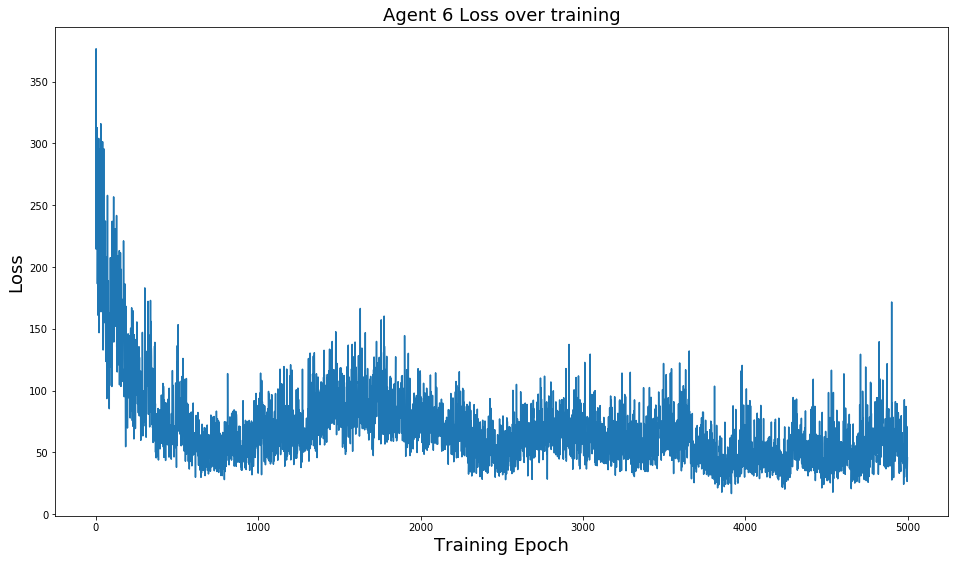

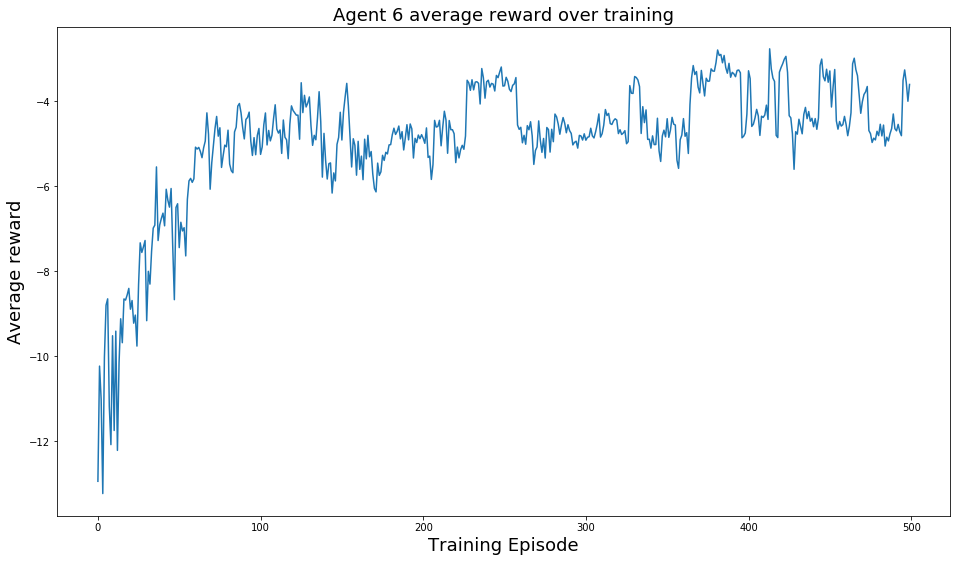

In [74]:
## AGENT TRAINING RESULTS
# Path to results folder
results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)

# Loop over each agent
for idx , agent in Balance_int_MultiDQN_Agents.Agents.items():
    intersection_number_in_vissim = Balance_int_MultiDQN_Agents.Agents[0].signal_id + 1
    print("Intersection "+str(intersection_number_in_vissim))
    
    ## SAVE TRAINING DATA TO JSON.
    json_filename = "Agent{}_Loss_average_reward.json".format(intersection_number_in_vissim)
    Loss_reward = dict()   
    # Loss dictionary
    for epoch, loss in enumerate(agent.loss):
        loss_dict = { epoch : loss }
    Loss_reward['Agent{} loss'.format(intersection_number_in_vissim)] = loss_dict
    # Reward dictionary            
    episode = [i for i in range(len(agent.reward_storage))]
    Loss_reward['Agent{} Average_Reward'.format(intersection_number_in_vissim)] = agent.reward_storage
    # Store as JSON
    with open(results_path + "/" + dictionary_filename, 'w') as f:
        json.dump(Loss_reward, f)
    print("Agent {}: Training Loss and Average Reward during training successfuly saved to file:".format(intersection_number_in_vissim))
    print(results_path + "/" + json_filename)
    
    ## LOADING DATA FROM JSON
    #results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
    #dictionary_filename = "Agent{}_Loss_average_reward.json".format(intersection_number_in_vissim)
    #with open(results_path + "/" + json_filename, 'r') as fp:
    #    data = json.load(fp)
    #print(data)
    
    ## TRAINING PLOTS
    loss_plot_filename  = "Agent{}_Loss.png".format(intersection_number_in_vissim)
    reward_plot_filename  = "Agent{}_average_reward.png".format(intersection_number_in_vissim) 
    
    ## Loss Plot
    plt.figure('LossAgent'+str(idx),figsize=(16,9))
    plt.plot(agent.loss)
    plt.xlabel('Training Epoch',fontsize=18)
    plt.ylabel('Loss',fontsize=18)
    plt.title('Agent {} Loss over training'.format(intersection_number_in_vissim),fontsize=18)
    plt.savefig(results_path + "/" + loss_plot_filename)

    ## Average Reward Plot
    plt.figure('RewardAgent'+str(idx),figsize=(16,9))
    plt.plot(agent.reward_storage)
    plt.xlabel('Training Episode',fontsize=18)
    plt.ylabel('Average reward',fontsize=18)
    plt.title('Agent {} average reward over training'.format(intersection_number_in_vissim),fontsize=18)
    plt.savefig(results_path + "/" + reward_plot_filename)
    

In [ ]:
Balance_int_MultiDQN_Agents.load(500, best = False)

In [ ]:
Balance_int_MultiDQN_Agents.demo()

In [10]:
Episode_Queues, Cumulative_Episode_Delays,Cumulative_Episode_stop_Delays, Cumulative_Totale_network_delay,Cumulative_Totale_network_stop_delay  = Balance_int_MultiDQN_Agents.test()

Working Directory set to: E:\OneDrive - University of Warwick\Desktop\ATI\0_TMF\MLforFlowOptimisation\Vissim
Generating Cache...
Cache generated.

****************************
*   COM Server dispatched  *
****************************

Attempting to load Model File: Balance_int6.inpx ...
Model File load process successful.
Simulation length set to 9001 seconds.
Results from Previous Simulations: Deleted. Fresh Start Available.
Fetched and containerized Network Object 

*******************************************************
*                                                     *
*                COM SETUP COMPLETE                   *
*                                                     *
*******************************************************

Random seed set in simulator. Random Seed = 542
Deploying Network Parser...
Successful Network Crawl: Identified SignalControllers, Links, Lanes and Vehicle Inputs.

Setting Simulation mode to: test
Starting Deployments of Signal Control Units...

0
[[0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 0.0], [0.0, 0.0, 4.960383379104314], [0.0, 0.0, 5.768555959485369], [0.0, 0.0, 5.691337174209982], [0.0, 0.0, 5.691328662827345], [0.0, 0.0, 5.691328662827345], [0.0, 0.0, 5.383482978496014], [0.0, 0.0, 0.0], [1.9518866102172752, 0.0, 0.0], [6.013053104663572, 0.0, 0.0], [5.765642844538815, 0.0, 0.0], [5.7522042607603225, 0.0, 0.0], [5.7522042607603225, 0.0, 0.0], [5.7522042607603225, 0.0, 0.0], [5.752204

Agent 6: Queues during Test successfuly saved to file:
E:\OneDrive - University of Warwick\Desktop\ATI\0_TMF\MLforFlowOptimisation\Vissim\Balance_int6\Agents_Results\DDQN\Balance_int6_default_actions_500_9000_DDQN/Junction6_Queues.json


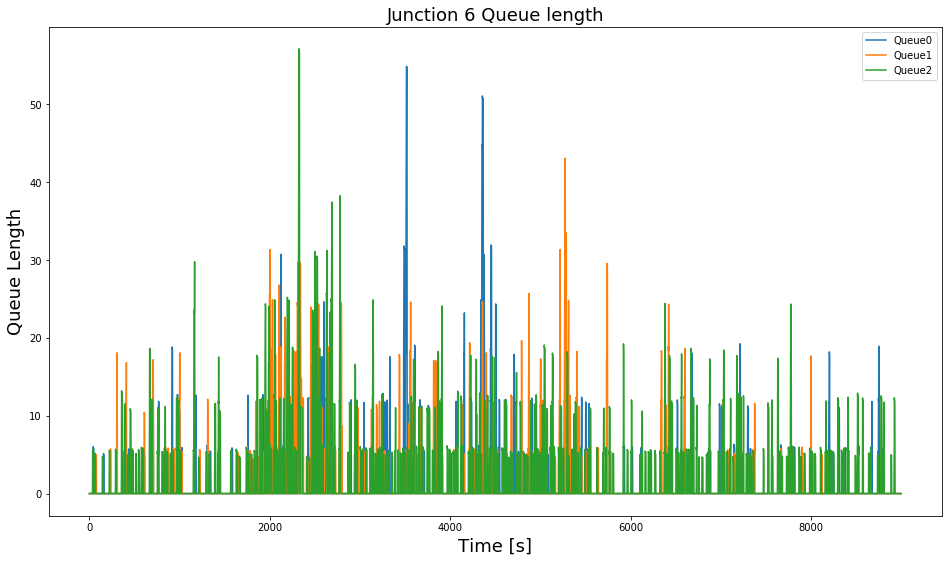

In [87]:
time = [t for t in range(len(Cumulative_Totale_network_stop_delay))]

########################################
## Queues over time for each junction ##
########################################
for idx, queues in Episode_Queues.items():
    # Identify Junction ID in map
    intersection_number_in_vissim = Balance_int_MultiDQN_Agents.Agents[0].signal_id + 1
    
    queues = np.array(queues)
    queues = queues.T
    number_queues = np.size(queues,0)
    
    plt.figure('1'+str(idx),figsize=(16, 9))
    
    Queues = dict()
    Queues['Time'] = time
    Queues_legend = []
    
    for i, queue in enumerate(queues):
        plt.plot(queue, label = "Queue"+str(i))
        Queues[str(i)] = queue.tolist()
        Queues_legend.append("Queue"+str(i))
    
    ## Plot the queues
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Queue Length',fontsize=18)
    plt.title('Junction {} Queue length'.format(intersection_number_in_vissim),fontsize=18)
    plt.gca().legend(Queues_legend)
    
    filename = "Junction{}_Queues.png".format(intersection_number_in_vissim)           
    plt.savefig(results_path + "/" + filename)
    
    # Store as JSON
    json_filename = "Junction{}_Queues.json".format(intersection_number_in_vissim)        
    with open(results_path + "/" + dictionary_filename, 'w') as f:
        json.dump(Queues, f)
        
    ### LOADING DATA FROM JSON
    #results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
    #dictionary_filename = "Junction{}_Queues.json".format(intersection_number_in_vissim)
    #with open(results_path + "/" + dictionary_filename, 'r') as fp:
    #    data = json.load(fp)
    #print(data)
        
    # Success Message
    print("Agent {}: Queues during Test successfuly saved to file:".format(intersection_number_in_vissim))
    print(results_path + "/" + json_filename)

Agent 6: Queues during Test successfuly saved to file:
E:\OneDrive - University of Warwick\Desktop\ATI\0_TMF\MLforFlowOptimisation\Vissim\Balance_int6\Agents_Results\DDQN\Balance_int6_default_actions_500_9000_DDQN/Junction6_Queues.json
Agent 6: Test Cumulative Delay successfuly saved to file:
E:\OneDrive - University of Warwick\Desktop\ATI\0_TMF\MLforFlowOptimisation\Vissim\Balance_int6\Agents_Results\DDQN\Balance_int6_default_actions_500_9000_DDQN/Junction6_Cumulative_Delay.json
Agent 6: Test Cumulative Stop Delay successfuly saved to file:
E:\OneDrive - University of Warwick\Desktop\ATI\0_TMF\MLforFlowOptimisation\Vissim\Balance_int6\Agents_Results\DDQN\Balance_int6_default_actions_500_9000_DDQN/Junction6_Cumulative_Stop_Delay.json


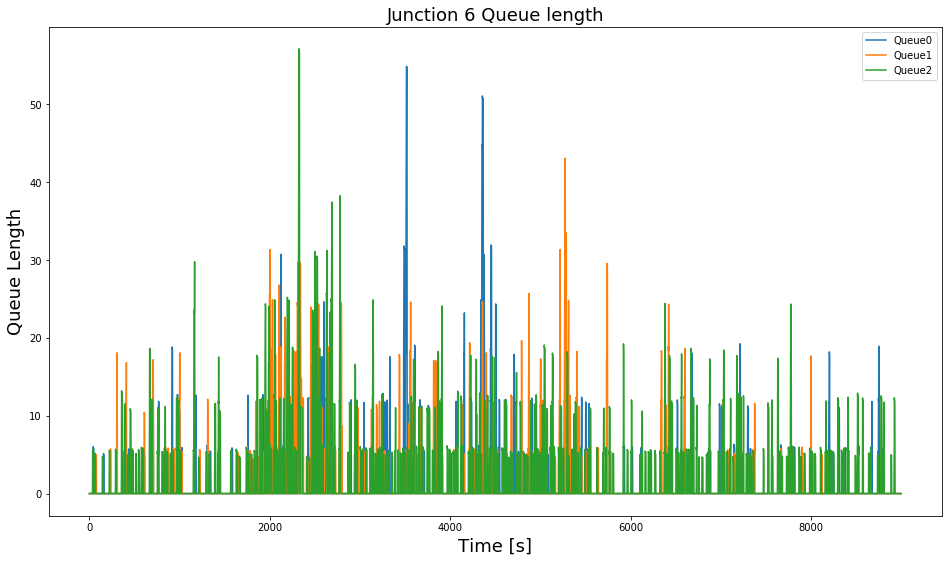

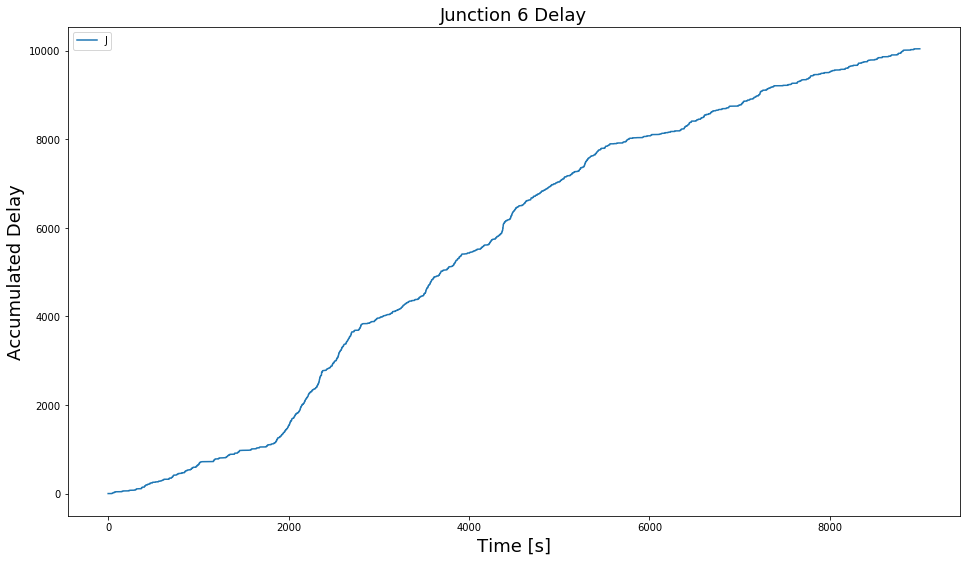

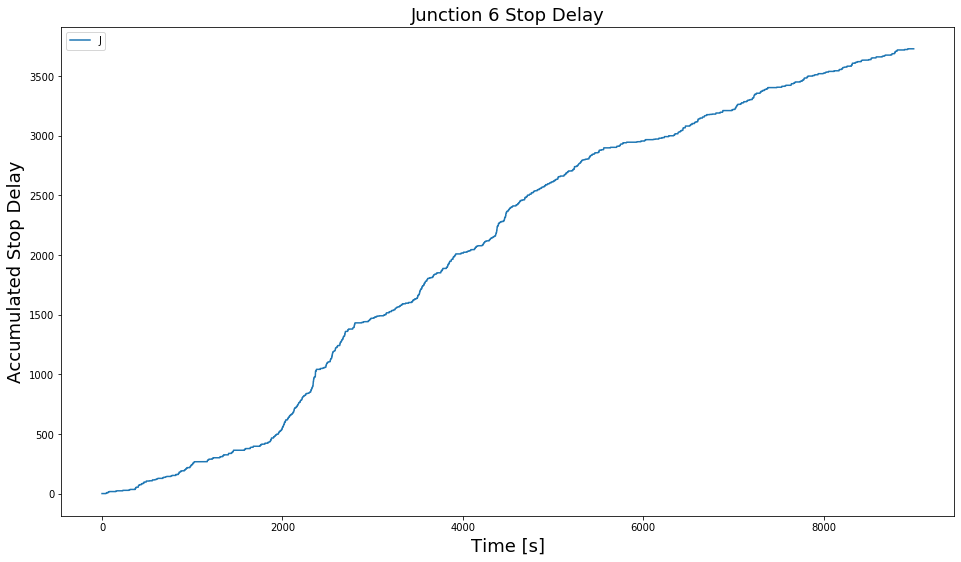

In [88]:
results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
time = [t for t in range(len(Cumulative_Totale_network_stop_delay))]

########################################
## Queues over time for each junction ##
########################################
for idx, queues in Episode_Queues.items():
    # Identify Junction ID in map
    intersection_number_in_vissim = Balance_int_MultiDQN_Agents.Agents[0].signal_id + 1
    
    queues = np.array(queues)
    queues = queues.T
    number_queues = np.size(queues,0)
    
    plt.figure('1'+str(idx),figsize=(16, 9))
    
    Queues = dict()
    Queues['Time'] = time
    Queues_legend = []
    
    for i, queue in enumerate(queues):
        plt.plot(queue, label = "Queue"+str(i))
        Queues[str(i)] = queue.tolist()
        Queues_legend.append("Queue"+str(i))
    
    ## Plot the queues
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Queue Length',fontsize=18)
    plt.title('Junction {} Queue length'.format(intersection_number_in_vissim),fontsize=18)
    plt.gca().legend(Queues_legend)
    
    filename = "Junction{}_Queues.png".format(intersection_number_in_vissim)           
    plt.savefig(results_path + "/" + filename)
    
    # Store as JSON
    json_filename = "Junction{}_Queues.json".format(intersection_number_in_vissim)        
    with open(results_path + "/" + json_filename, 'w') as f:
        json.dump(Queues, f)
        
    ### LOADING DATA FROM JSON
    #results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
    #json_filename = "Junction{}_Queues.json".format(intersection_number_in_vissim)
    #with open(results_path + "/" + json_filename, 'r') as fp:
    #    data = json.load(fp)
    #print(data)
        
    # Success Message
    print("Agent {}: Queues during Test successfuly saved to file:".format(intersection_number_in_vissim))
    print(results_path + "/" + json_filename)
       
        
###################################################        
## Accumulated delay over time for each junction ##
###################################################
for idx, delay in Cumulative_Episode_Delays.items():
    # Identify Junction ID in map
    intersection_number_in_vissim = Balance_int_MultiDQN_Agents.Agents[idx].signal_id + 1

    # Extract and process delay data
    Delay = dict()   
    Delay['Time'] = time
    Delay['Junction {} delay'.format(intersection_number_in_vissim)] = delay
    
    # Store as JSON
    json_filename = "Junction{}_Cumulative_Delay.json".format(intersection_number_in_vissim)        
    with open(results_path + "/" + json_filename, 'w') as f:
        json.dump(Delay, f)
        
    # Success Message
    print("Agent {}: Test Cumulative Delay successfuly saved to file:".format(intersection_number_in_vissim))
    print(results_path + "/" + json_filename)
    
    ### Loading data from JSON
    #results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
    #dictionary_filename = "Junction{}_Cumulative_Delay.json".format(intersection_number_in_vissim)
    #with open(results_path + "/" + json_filename, 'r') as fp:
    #    data = json.load(fp)
    #print(data)

    # Plot the cumulative delay
    plt.figure('2'+str(idx),figsize=(16, 9))
    plt.plot(delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Delay',fontsize=18)
    plt.title('Junction {} Delay'.format(intersection_number_in_vissim),fontsize=18)
    plt.gca().legend('Junction accumulated delay')
    
    filename = "Junction{}_Cumulative_Delay.png".format(intersection_number_in_vissim)
    plt.savefig(results_path + "/" + filename)
    
    
    
########################################################    
## Accumulated stop delay over time for each junction ##
########################################################
for idx, stop_delay in Cumulative_Episode_stop_Delays.items():
    # Identify Junction ID in map
    intersection_number_in_vissim = Balance_int_MultiDQN_Agents.Agents[idx].signal_id + 1    
    
    # Extract and process stop delay data
    Stop_delay = dict()   
    Stop_delay['Time'] = time
    Stop_delay['Junction {} stop delay'.format(intersection_number_in_vissim)] = stop_delay
    
    # Store as JSON
    json_filename = "Junction{}_Cumulative_Stop_Delay.json".format(intersection_number_in_vissim)        
    with open(results_path + "/" + json_filename, 'w') as f:
        json.dump(Stop_delay, f)
    
    # Success Message
    print("Agent {}: Test Cumulative Stop Delay successfuly saved to file:".format(intersection_number_in_vissim))
    print(results_path + "/" + json_filename)
        
    ### Loading data from JSON
    #results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
    #dictionary_filename = "Junction{}_Cumulative_Stop_Delay.json".format(intersection_number_in_vissim)
    #with open(results_path + "/" + json_filename, 'r') as fp:
    #    data = json.load(fp)
    #print(data)
    
    # Plot the cumulative stop delay
    plt.figure('3'+str(idx),figsize=(16, 9))
    plt.plot(stop_delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Stop Delay',fontsize=18)
    plt.title('Junction {} Stop Delay'.format(intersection_number_in_vissim),fontsize=18)
    plt.gca().legend('Junction accumulated Stop delay')
    
    filename = "Junction{}_Cumulative_Stop_Delay.png".format(intersection_number_in_vissim)
    plt.savefig(results_path + "/" + filename)

    
    
###############################################
## ONLY IF THERE IS MORE THAN ONE CONTROLLER ##
##    These are the global network plots     ##
###############################################

if len(Balance_int_MultiDQN_Agents.Agents) > 1:
    ########################################    
    ## Global Accumulated delay over time ##
    ########################################
    
    # Process global delay data
    Global_delay = dict()   
    Global_delay['Time'] = time
    Global_delay['Global accumulated Delay'] = Cumulative_Totale_network_delay
    
    # Store as JSON
    json_filename = "Global_Cumulative_Delay.json"
    with open(results_path + "/" + json_filename, 'w') as f:
        json.dump(Global_delay, f)
    
    # Success Message
    print("Agent {}: Test Cumulative Global Delay successfuly saved to file:")
    print(results_path + "/" + json_filename)
        
    ### Loading data from JSON
    #results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
    #dictionary_filename = "Global_Cumulative_Delay.json"
    #with open(results_path + "/" + json_filename, 'r') as fp:
    #    data = json.load(fp)
    #print(data)

    
    # Plot the global delay
    plt.figure('4',figsize=(16,9))
    plt.plot(Cumulative_Totale_network_delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Global accumulated Delay',fontsize=18)
    plt.title('Global accumulated Delay',fontsize=18)
    plt.gca().legend('Global accumulated delay')

    filename = "Global_Cumulative_Delay.png".format(intersection_number_in_vissim)
    plt.savefig(results_path + "/" + filename)


    #############################################
    ## Global Accumulated stop delay over time ##
    #############################################
    
    # Process global stop delay data
    Global_stop_delay = dict()   
    Global_stop_delay['Time'] = time
    Global_stop_delay['Global accumulated stop Delay'] = Cumulative_Totale_network_stop_delay
    
    # Store as JSON
    json_filename = "Global_Cumulative_Stop_Delay.json"
    with open(results_path + "/" + json_filename, 'w') as f:
        json.dump(Global_stop_delay, f)
    
    # Success Message
    print("Agent {}: Test Cumulative Global Stop Delay successfuly saved to file:")
    print(results_path + "/" + json_filename)
        
    ### Loading data from JSON
    #results_path = os.path.join(vissim_working_directory, model_name, "Agents_Results", agent_type, Session_ID)
    #dictionary_filename = "Global_Cumulative_Stop_Delay.json"
    #with open(results_path + "/" + json_filename, 'r') as fp:
    #    data = json.load(fp)
    #print(data)

    # Plot the global stop delay
    plt.figure('5'+str(idx),figsize=(16, 9))
    plt.plot(Cumulative_Totale_network_stop_delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Global accumulated stop Delay',fontsize=18)
    plt.title('Global accumulated stop Delay',fontsize=18)
    plt.gca().legend('Global accumulated stop Delay')
    
    filename = "Global_Cumulative_Delay.png".format(intersection_number_in_vissim)
    plt.savefig(results_path + "/" + filename)



# Balance RL DQN

In [ ]:
model_name  = 'Balance'
#vissim_working_directory = 'C:\\Users\\acabrejasegea\\OneDrive - The Alan Turing Institute\\Desktop\\ATI\\0_TMF\\MLforFlowOptimisation\\Vissim\\'
vissim_working_directory = "E:\\Backup - Onedrive\\Desktop\\ATI\\0_TMF\\MLforFlowOptimisation\\Vissim"
sim_length = 3601
agent_type = "DDQN"

# Ojo aqui, hack
Session_ID = "DQN"


# all controller actions
Balance_dictionary = balance_dictionary(agent_type)

## DQN Hyperaramenters
episodes = 1000
copy_weights_frequency = 10

PER_activated = True
memory_size = 5000
batch_size = 512*2

gamma = 0.95
alpha = 0.001

In [ ]:
# Exploration Schedule ("linear" or "geometric")
exploration_schedule = "geometric"
epsilon_start = 1
epsilon_end   = 0.001

Random_Seed = 100

def choose_schedule(exploration_schedule, espilon_start, epsilon_end, episodes):
    if exploration_schedule == "linear":
        epsilon_decay = 1.2*(epsilon_end - epsilon_start)/(episodes-1)
        epsilon_sequence = [1 + epsilon_decay * entry for entry in range(episodes+1)]
        epsilon_sequence = [0 if entry < 0 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "geometric":
        epsilon_decay = np.power(epsilon_end/epsilon_start, 1./(episodes-1)) # Geometric decay
        epsilon_sequence = [epsilon_start * epsilon_decay ** entry for entry in range(episodes+1)]
    elif exploration_schedule == "entropy":
        pass
    else:
        print("ERROR: Unrecognized choice of exploration schedule.")
        
    # Plotting exploration schedule
    plt.figure(figsize=(8,4.5))
    x_series = np.array(range(1,episodes+1))
    y_series = epsilon_sequence[0:episodes]
    plt.plot(x_series, y_series, '-b')
    plt.xlabel('Episodes')
    plt.ylabel('Ratio of random exploration')
    plt.title('Exploration schedule')
    plt.show()
    return(epsilon_sequence)

epsilon_sequence = choose_schedule(exploration_schedule, epsilon_start, epsilon_end, episodes)


In [ ]:
Balance_MultiDQN_Agents = MasterDQN_Agent(model_name, vissim_working_directory, sim_length, Balance_dictionary,\
                gamma, alpha, agent_type, memory_size, PER_activated, batch_size, copy_weights_frequency, epsilon_sequence,\
                Random_Seed = Random_Seed, timesteps_per_second = 1, verbose = True)

In [ ]:
Balance_MultiDQN_Agents.prepopulate_memory()

In [ ]:
Balance_MultiDQN_Agents.train(episodes)

In [ ]:
Balance_MultiDQN_Agents.save(498)

In [ ]:
Balance_MultiDQN_Agents.demo()

In [ ]:
for idx , agent in Balance_MultiDQN_Agents.Agents.items():
    print(agent)
    print(idx)

In [ ]:
# For the agent training
ploty = 1
for idx , agent in Balance_MultiDQN_Agents.Agents.items():
    print("Agent "+str(idx))
    #print(ploty)
    #plt.subplot(14, 2, ploty)

    plt.figure('6'+str(idx),figsize=(4.5, 3))
    
    Loss_rewarddf = pd.DataFrame()   
    
    plt.plot(agent.loss)
    plt.xlabel('Episode',fontsize=18)
    plt.ylabel('Loss',fontsize=18)
    plt.title('Agent{} Loss over training'.format(idx),fontsize=18)
    plt.gca().legend('Agent Loss over training')
    
    Path  = os.path.join(vissim_working_directory, model_name, "DQN", \
                        "Agent{}_Loss.png".format(idx)) 
    #plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "DQN", \
                           "Agent{}_Loss_average_reward.csv".format(idx)) 
    ploty+=1
    #print(ploty)

    
    #plt.subplot(14, 2, ploty)
    plt.figure('7'+str(idx),figsize=(4.5, 3))
    plt.plot(agent.reward_storage)
    plt.xlabel('Episode',fontsize=18)
    plt.ylabel('Average reward',fontsize=18)
    plt.title('Agent{} average reward over training'.format(idx),fontsize=18)
    plt.gca().legend('Agent reward over training')
    
    Path  = os.path.join(vissim_working_directory, model_name, "DQN", Session_ID,\
                        "Agent{}_average_reward.png".format(idx)) 
    #plt.savefig(Path)
    
    
    episode = [i for i in range(len(agent.reward_storage))]
    
    Loss_rewarddf['episode'] = episode 
    Loss_rewarddf['Agent{} loss'.format(idx)] = agent.loss
    Loss_rewarddf['Agent{} Average_Reward'.format(idx)] = agent.reward_storage
    
    #Loss_rewarddf.to_csv(csv_Path,index=False)
    ploty+=1
    

In [ ]:
Episode_Queues, Cumulative_Episode_Delays,Cumulative_Episode_stop_Delays, Cumulative_Totale_network_delay,Cumulative_Totale_network_stop_delay  = Balance_MultiDQN_Agents.test()

In [ ]:
time = [t for t in range(len(Cumulative_Totale_network_stop_delay))]

# Queues ovzer time for each junction
for idx, queues in Episode_Queues.items():
    queues = np.array(queues)
    queues = queues.T
    
    plt.figure('1'+str(idx),figsize=(16, 9))
    
    Queuesdf = pd.DataFrame()
    
    Queuesdf['Time'] = time
    Queues_legend = []
    
    for i, queue in enumerate(queues):
        plt.plot(queue, label = "Queue"+str(i))
        Queuesdf[str(i)] = queue
        Queues_legend.append("Queue"+str(i))
        
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Queue Length',fontsize=18)
    plt.title('Junction {} Queue length'.format(idx),fontsize=18)
    #plt.gca().legend(Queues_legend)
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.png".format(idx))               
    plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.csv".format(idx))        
   
    Queuesdf.to_csv(csv_Path,index=False)
    plt.legend()
        
        
# Accumulated delay over time for each junction
for idx, delay in Cumulative_Episode_Delays.items():
    
    plt.figure('2'+str(idx),figsize=(16, 9))
    
    delaydf = pd.DataFrame()   
    delaydf['Time'] = time
    delaydf['Junction {} delay'.format(idx)] = delay
    
    plt.plot(delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Delay',fontsize=18)
    plt.title('Junction {} Delay'.format(idx),fontsize=18)
    plt.gca().legend('Junction accumulated delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_Delay.csv".format(idx))   
    plt.savefig(Path)

    delaydf.to_csv(csv_Path,index=False)
    
    
# Accumulated stop delay over time for each junction
for idx, stop_delay in Cumulative_Episode_stop_Delays.items():
    
    plt.figure('3'+str(idx),figsize=(16, 9))
    
    stop_delaydf = pd.DataFrame()   
    stop_delaydf['Time'] = time
    stop_delaydf['Junction {} stop delay'.format(idx)] = stop_delay

    plt.plot(stop_delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Stop Delay',fontsize=18)
    plt.title('Junction {} Stop Delay'.format(idx),fontsize=18)
    plt.gca().legend('Junction accumulated Stop delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_stop_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_stop_Delay.csv".format(idx))
    plt.savefig(Path)
    stop_delaydf.to_csv(csv_Path,index=False)
    
# Global Accumulated delay over time
plt.figure('4',figsize=(16,9))


Global_delaydf = pd.DataFrame()   
Global_delaydf['Time'] = time
Global_delaydf['Global accumulated Delay'] = Cumulative_Totale_network_delay

plt.plot(Cumulative_Totale_network_delay)
plt.xlabel('Time [s]',fontsize=18)
plt.ylabel('Global accumulated Delay',fontsize=18)
plt.title('Global accumulated Delay',fontsize=18)
plt.gca().legend('Global accumulated delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.csv")
plt.savefig(Path)
Global_delaydf.to_csv(csv_Path,index=False)

# Global Accumulated stop delay over time
plt.figure('5'+str(idx),figsize=(16, 9))

Global_stop_delaydf = pd.DataFrame()   
Global_stop_delaydf['Time'] = time
Global_stop_delaydf['Global accumulated stop Delay'] = Cumulative_Totale_network_stop_delay

plt.plot(Cumulative_Totale_network_stop_delay)
plt.xlabel('Time [s]',fontsize=18)
plt.ylabel('Global accumulated stop Delay',fontsize=18)
plt.title('Global accumulated stop Delay',fontsize=18)
plt.gca().legend('Global accumulated stop Delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.csv")
plt.savefig(Path)
Global_stop_delaydf.to_csv(csv_Path,index=False)

In [ ]:
Balance_MultiDQN_Agents.load(498, best = True)

In [ ]:
Balance_MultiDQN_Agents.demo()

# Single_Cross_Straight AC

---> The lack of speed comes from the size of the model (particularly the change of color of the heads). 

In [ ]:
model_name  = 'Single_Cross_Straight'
vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
sim_length = 3601

agent_type = "AC"
Session_ID = "Single_Cross_Straigth_AC"



# all controller actions
Single_Cross_Straight_dictionary =\
{'junctions' : {
    # Controller Number 0 
    0 : {'default_actions' : {     0 : [1, 0, 1, 0],
                                     1 : [0, 1, 0, 1]
        },
         
         'all_actions' : {     0 : [1, 0, 1, 0],
                                     1 : [0, 1, 0, 1]
        },
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '3-1', '5-1', '7-1'],
         'agent_type' : agent_type,
         'controled_by_com' : True,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [5],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' }
        },
 'demand' : { 'default' : [400, 400, 400, 400],
             
             0 : [200,200,200,200],
             1 : [400,400,400,400],
             2 : [900,500,900,500],
             3 : [1000,500,1000,500],
             4 : [700,500,700,500],
             5 : [500,700,500,700],
             6 : [500,1000,500,1000],
             7 : [500,900,500,900],
             8 : [400,400,400,400],
             9 : [200,200,200,200]
            }
 
}

In [ ]:
gamma = 0.95
alpha = 0.00001


value = 0.5
entropy = 0.5
n_step_size = 16
state_size = [5]
reduce_entropy_every = 100
Random_Seed = 100



# for the monitoring
horizon = 50
n_sample = 10


In [ ]:
Single_Cross_Straight_MultiAC_Agents = MasterAC_Agent(model_name, vissim_working_directory, sim_length, Single_Cross_Straight_dictionary,\
                n_step_size, gamma, alpha, entropy, value, \
                Random_Seed = Random_Seed, timesteps_per_second = 1, Session_ID = Session_ID, verbose = True, \
                 horizon = horizon, n_sample = n_sample)

In [ ]:
Single_Cross_Straight_MultiAC_Agents.train(200) 

In [ ]:
Single_Cross_Straight_MultiAC_Agents.save(401)


In [ ]:
Single_Cross_Straight_MultiAC_Agents.load(200, best = True)
            
            
            
        
            

In [ ]:
Episode_Queues, Cumulative_Episode_Delays,Cumulative_Episode_stop_Delays, Cumulative_Totale_network_delay,Cumulative_Totale_network_stop_delay = Single_Cross_Straight_MultiAC_Agents.test()

In [ ]:
time = [t for t in range(len(Cumulative_Totale_network_stop_delay))]

# Queues ovzer time for each junction
for idx, queues in Episode_Queues.items():
    queues = np.array(Episode_Queues[0])
    queues = queues.T
    
    plt.figure('1'+str(idx),figsize=(16, 9))
    
    Queuesdf = pd.DataFrame()
    
    Queuesdf['Time'] = time
    Queues_legend = []
    
    for i, queue in enumerate(queues):
        plt.plot(queue)
        Queuesdf[str(i)] = queue
        Queues_legend.append("Queue"+str(i))
        
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Queue Length',fontsize=18)
    plt.title('Junction {} Queue length'.format(idx),fontsize=18)
    plt.gca().legend(Queues_legend)
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.png".format(idx))               
    plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.csv".format(idx))        
   
    Queuesdf.to_csv(csv_Path,index=False)
        
        
# Accumulated delay over time for each junction
for idx, delay in Cumulative_Episode_Delays.items():
    
    plt.figure('2'+str(idx),figsize=(16, 9))
    
    delaydf = pd.DataFrame()   
    delaydf['Time'] = time
    delaydf['Junction {} delay'.format(idx)] = delay
    
    plt.plot(delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Delay',fontsize=18)
    plt.title('Junction {} Delay'.format(idx),fontsize=18)
    plt.gca().legend('Junction accumulated delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_Delay.csv".format(idx))   
    plt.savefig(Path)

    delaydf.to_csv(csv_Path,index=False)
    
    
# Accumulated stop delay over time for each junction
for idx, stop_delay in Cumulative_Episode_stop_Delays.items():
    
    plt.figure('3'+str(idx),figsize=(16, 9))
    
    stop_delaydf = pd.DataFrame()   
    stop_delaydf['Time'] = time
    stop_delaydf['Junction {} stop delay'.format(idx)] = stop_delay

    plt.plot(stop_delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Stop Delay',fontsize=18)
    plt.title('Junction {} Stop Delay'.format(idx),fontsize=18)
    plt.gca().legend('Junction accumulated Stop delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_stop_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_stop_Delay.csv".format(idx))
    plt.savefig(Path)
    stop_delaydf.to_csv(csv_Path,index=False)
    
# Global Accumulated delay over time
plt.figure('4',figsize=(16,9))


Global_delaydf = pd.DataFrame()   
Global_delaydf['Time'] = time
Global_delaydf['Global accumulated Delay'] = Cumulative_Totale_network_delay

plt.plot(Cumulative_Totale_network_delay)
plt.xlabel('Time [s]',fontsize=18)
plt.ylabel('Global accumulated Delay',fontsize=18)
plt.title('Global accumulated Delay',fontsize=18)
plt.gca().legend('Global accumulated delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.csv")
plt.savefig(Path)
Global_delaydf.to_csv(csv_Path,index=False)

# Global Accumulated stop delay over time
plt.figure('5'+str(idx),figsize=(16, 9))

Global_stop_delaydf = pd.DataFrame()   
Global_stop_delaydf['Time'] = time
Global_stop_delaydf['Global accumulated stop Delay'] = Cumulative_Totale_network_stop_delay

plt.plot(Cumulative_Totale_network_stop_delay)
plt.xlabel('Time [s]',fontsize=18)
plt.ylabel('Global accumulated stop Delay',fontsize=18)
plt.title('Global accumulated stop Delay',fontsize=18)
plt.gca().legend('Global accumulated stop Delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.csv")
plt.savefig(Path)
Global_stop_delaydf.to_csv(csv_Path,index=False)


# For the agent training

for idx , agent in  Single_Cross_Straight_MultiAC_Agents.Agents.items():  
    plt.figure('6'+str(idx),figsize=(16, 9))
    
    Loss_rewarddf = pd.DataFrame()   
    
    plt.plot(agent.loss)
    plt.xlabel('Episode',fontsize=18)
    plt.ylabel('Loss',fontsize=18)
    plt.title('Agent{} Loss over training'.format(idx),fontsize=18)
    plt.gca().legend('Agent Loss over training')
    
    Path  = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Agent{}_Loss.png".format(idx)) 
    plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                           "Agent{}_Loss_average_reward.csv".format(idx)) 
    
    
    plt.figure('7'+str(idx),figsize=(16, 9))
    plt.plot(agent.reward_storage)
    plt.xlabel('Episode',fontsize=18)
    plt.ylabel('Average reward',fontsize=18)
    plt.title('Agent{} average reward over training'.format(idx),fontsize=18)
    plt.gca().legend('Agent reward over training')
    
    Path  = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Agent{}_average_reward.png".format(idx)) 
    plt.savefig(Path)
    
    
    episode = [i for i in range(len(agent.reward_storage))]
    
    Loss_rewarddf['episode'] = episode 
    Loss_rewarddf['Agent{} loss'.format(idx)] = agent.loss
    Loss_rewarddf['Agent{} Average_Reward'.format(idx)] = agent.reward_storage
    
    Loss_rewarddf.to_csv(csv_Path,index=False)

In [ ]:
Single_Cross_Straight_MultiAC_Agents.Agents[0].Loss

In [ ]:
Single_Cross_Straight_MultiAC_Agents.demo()

# Single_Cross_Straight DQN

In [ ]:
model_name  = 'Single_Cross_Straight'
vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
sim_length = 3601

agent_type = "DuelingDQN"
Session_ID = "Single_Cross_Straigth_DuelingDQN20c0"

# all controller actions
# all controller actions
Single_Cross_Straight_dictionary =\
{'junctions' : {
    # Controller Number 0 
    0 : {'default_actions' : {     0 : [1, 0, 1, 0],
                                     1 : [0, 1, 0, 1]
        },
         
         'all_actions' : {     0 : [1, 0, 1, 0],
                                     1 : [0, 1, 0, 1]
        },
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '3-1', '5-1', '7-1'],
         'agent_type' : agent_type,
         'controled_by_com' : True,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [5],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues',
         'queues_counter_ID' : [1,2,3,4]  }
        },
 'demand' : { 'default' : [400, 400, 400, 400],
             
             0 : [200,200,200,200],
             1 : [400,400,400,400],
             2 : [900,500,900,500],
             3 : [1000,500,1000,500],
             4 : [700,500,700,500],
             5 : [500,700,500,700],
             6 : [500,1000,500,1000],
             7 : [500,900,500,900],
             8 : [400,400,400,400],
             9 : [200,200,200,200]
            }
 
}

## DQN Hyperaramenters
episodes = 300
copy_weights_frequency = 10

PER_activated = True
memory_size = 1000
batch_size = 128

gamma = 0.95
alpha = 0.005

In [ ]:
# Exploration Schedule ("linear" or "geometric")
exploration_schedule = "geometric"
epsilon_start = 1
epsilon_end   = 0.001

Random_Seed = 100

def choose_schedule(exploration_schedule, espilon_start, epsilon_end, episodes):
    if exploration_schedule == "linear":
        epsilon_decay = 1.2*(epsilon_end - epsilon_start)/(episodes-1)
        epsilon_sequence = [1 + epsilon_decay * entry for entry in range(episodes+1)]
        epsilon_sequence = [0 if entry < 0 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "geometric":
        epsilon_decay = np.power(epsilon_end/epsilon_start, 1./(episodes-1)) # Geometric decay
        epsilon_sequence = [epsilon_start * epsilon_decay ** entry for entry in range(episodes+1)]
    elif exploration_schedule == "entropy":
        pass
    else:
        print("ERROR: Unrecognized choice of exploration schedule.")
        
    # Plotting exploration schedule
    plt.figure(figsize=(8,4.5))
    x_series = np.array(range(1,episodes+1))
    y_series = epsilon_sequence[0:episodes]
    plt.plot(x_series, y_series, '-b')
    plt.xlabel('Episodes')
    plt.ylabel('Ratio of random exploration')
    plt.title('Exploration schedule')
    plt.show()
    return(epsilon_sequence)

epsilon_sequence = choose_schedule(exploration_schedule, epsilon_start, epsilon_end, episodes)

In [ ]:
Single_Cross_Straight_MultiDQN_Agents = MasterDQN_Agent(model_name, vissim_working_directory, sim_length, Single_Cross_Straight_dictionary,\
                gamma, alpha, agent_type, memory_size, PER_activated, batch_size, copy_weights_frequency, epsilon_sequence,\
                Random_Seed = Random_Seed, timesteps_per_second = 1, Session_ID = Session_ID, verbose = True)

In [ ]:
Single_Cross_Straight_MultiDQN_Agents.prepopulate_memory()

In [ ]:
Single_Cross_Straight_MultiDQN_Agents.train(episodes)

In [ ]:
Single_Cross_Straight_MultiDQN_Agents.save(401)

In [ ]:
Single_Cross_Straight_MultiDQN_Agents.load(300 , best = True)

In [ ]:
Episode_Queues, Cumulative_Episode_Delays,Cumulative_Episode_stop_Delays, Cumulative_Totale_network_delay,Cumulative_Totale_network_stop_delay  = Single_Cross_Straight_MultiDQN_Agents.test()

In [ ]:
time = [t for t in range(len(Cumulative_Totale_network_stop_delay))]

# Queues ovzer time for each junction
for idx, queues in Episode_Queues.items():
    queues = np.array(Episode_Queues[0])
    queues = queues.T
    
    plt.figure('1'+str(idx),figsize=(16, 9))
    
    Queuesdf = pd.DataFrame()
    
    Queuesdf['Time'] = time
    Queues_legend = []
    
    for i, queue in enumerate(queues):
        plt.plot(queue)
        Queuesdf[str(i)] = queue
        Queues_legend.append("Queue"+str(i))
        
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Queue Length',fontsize=18)
    plt.title('Junction {} Queue length'.format(idx),fontsize=18)
    plt.gca().legend(Queues_legend)
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.png".format(idx))               
    plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.csv".format(idx))        
   
    Queuesdf.to_csv(csv_Path,index=False)
        
        
# Accumulated delay over time for each junction
for idx, delay in Cumulative_Episode_Delays.items():
    
    plt.figure('2'+str(idx),figsize=(16, 9))
    
    delaydf = pd.DataFrame()   
    delaydf['Time'] = time
    delaydf['Junction {} delay'.format(idx)] = delay
    
    plt.plot(delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Delay',fontsize=18)
    plt.title('Junction {} Delay'.format(idx),fontsize=18)
    plt.gca().legend('Junction accumulated delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_Delay.csv".format(idx))   
    plt.savefig(Path)

    delaydf.to_csv(csv_Path,index=False)
    
    
# Accumulated stop delay over time for each junction
for idx, stop_delay in Cumulative_Episode_stop_Delays.items():
    
    plt.figure('3'+str(idx),figsize=(16, 9))
    
    stop_delaydf = pd.DataFrame()   
    stop_delaydf['Time'] = time
    stop_delaydf['Junction {} stop delay'.format(idx)] = stop_delay

    plt.plot(stop_delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Stop Delay',fontsize=18)
    plt.title('Junction {} Stop Delay'.format(idx),fontsize=18)
    plt.gca().legend('Junction accumulated Stop delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_stop_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_stop_Delay.csv".format(idx))
    plt.savefig(Path)
    stop_delaydf.to_csv(csv_Path,index=False)
    
# Global Accumulated delay over time
plt.figure('4',figsize=(16,9))


Global_delaydf = pd.DataFrame()   
Global_delaydf['Time'] = time
Global_delaydf['Global accumulated Delay'] = Cumulative_Totale_network_delay

plt.plot(Cumulative_Totale_network_delay)
plt.xlabel('Time [s]',fontsize=18)
plt.ylabel('Global accumulated Delay',fontsize=18)
plt.title('Global accumulated Delay',fontsize=18)
plt.gca().legend('Global accumulated delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.csv")
plt.savefig(Path)
Global_delaydf.to_csv(csv_Path,index=False)

# Global Accumulated stop delay over time
plt.figure('5'+str(idx),figsize=(16, 9))

Global_stop_delaydf = pd.DataFrame()   
Global_stop_delaydf['Time'] = time
Global_stop_delaydf['Global accumulated stop Delay'] = Cumulative_Totale_network_stop_delay

plt.plot(Cumulative_Totale_network_stop_delay)
plt.xlabel('Time [s]',fontsize=18)
plt.ylabel('Global accumulated stop Delay',fontsize=18)
plt.title('Global accumulated stop Delay',fontsize=18)
plt.gca().legend('Global accumulated stop Delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.csv")
plt.savefig(Path)
Global_stop_delaydf.to_csv(csv_Path,index=False)


# For the agent training

for idx , agent in  Single_Cross_Straight_MultiDQN_Agents.Agents.items():  
    plt.figure('6'+str(idx),figsize=(16, 9))
    
    Loss_rewarddf = pd.DataFrame()   
    
    plt.plot(agent.loss)
    plt.xlabel('Episode',fontsize=18)
    plt.ylabel('Loss',fontsize=18)
    plt.title('Agent{} Loss over training'.format(idx),fontsize=18)
    plt.gca().legend('Agent Loss over training')
    
    Path  = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Agent{}_Loss.png".format(idx)) 
    plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                           "Agent{}_Loss_average_reward.csv".format(idx)) 
    
    
    plt.figure('7'+str(idx),figsize=(16, 9))
    plt.plot(agent.reward_storage)
    plt.xlabel('Episode',fontsize=18)
    plt.ylabel('Average reward',fontsize=18)
    plt.title('Agent{} average reward over training'.format(idx),fontsize=18)
    plt.gca().legend('Agent reward over training')
    
    Path  = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Agent{}_average_reward.png".format(idx)) 
    plt.savefig(Path)
    
    
    episode = [i for i in range(len(agent.reward_storage))]
    
    Loss_rewarddf['episode'] = episode 
    Loss_rewarddf['Agent{} loss'.format(idx)] = agent.loss
    Loss_rewarddf['Agent{} Average_Reward'.format(idx)] = agent.reward_storage
    
    Loss_rewarddf.to_csv(csv_Path,index=False)

In [ ]:
Single_Cross_Straight_MultiDQN_Agents.demo()

# Single_Cross_Triple 4 actions AC

In [ ]:
model_name  = 'Single_Cross_Triple'
vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
sim_length = 3600

agent_type = "AC"
Session_ID = "Single_Cross_TripleAC4test1"

# all controller actions
Single_Cross_Triple_dictionary4 =\
{\
    # Controller Number 0 
   'junctions' : {0 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             },
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             },
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '1-2', '1-3', '3-1', '3-2', '3-3', '5-1', '5-2', '5-3', '7-1', '7-2', '7-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' 
         }
    },
   'demand' : {"default" : [400,400,400,400] }
}

In [ ]:
gamma = 0.85
alpha = 0.00005


value = 0.5
entropy = 5000
n_step_size = 4
state_size = [13]
reduce_entropy_every = 100
Random_Seed = 100



# for the monitoring
horizon = 50
n_sample = 10


In [ ]:
Single_Cross_Triple4_MultiAC_Agents = MasterAC_Agent(model_name, vissim_working_directory, sim_length, Single_Cross_Triple_dictionary4,\
                n_step_size, gamma, alpha, entropy, value, \
                Random_Seed = Random_Seed, timesteps_per_second = 1, Session_ID = Session_ID, verbose = True, \
                 horizon = horizon, n_sample = n_sample)

In [ ]:
Single_Cross_Triple4_MultiAC_Agents.train(400) 

In [ ]:
Single_Cross_Triple4_MultiAC_Agents.save(401)

In [ ]:
Single_Cross_Triple4_MultiAC_Agents.load(50, best = False)

In [ ]:
Episode_Queues, Cumulative_Episode_Delays, Cumulative_Totale_network_delay = Single_Cross_Triple4_MultiAC_Agents.test()

In [ ]:
Single_Cross_Triple4_MultiAC_Agents.demo()

# Single_Cross_Triple 4 action DQN

In [ ]:
model_name  = 'Single_Cross_Triple'
vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
sim_length = 3601

Session_ID = "Single_Cross_Triple4_actions"
#Session_ID = "DQN"

agent_type = "DuelingDDQN"

# all controller actions
Single_Cross_Triple_dictionary4 =\
{ 'junctions' : {
    # Controller Number 0 
    0 : {'default_actions' :    {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                     1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                     2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                     3 : [0,0,0,0,0,0,0,0,0,1,1,1]},
         
         
         'all_actions' :       {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                     1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                     2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                     3 : [0,0,0,0,0,0,0,0,0,1,1,1]},
         
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '1-2', '1-3', '3-1', '3-2', '3-3', '5-1', '5-2', '5-3', '7-1', '7-2', '7-3'],
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 1,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' 
         },
        },
     'demand' : { 'default' : [400, 400, 400, 400]}
                  
}

In [ ]:
## DQN Hyperaramenters
episodes = 400
copy_weights_frequency = 5

PER_activated = True
memory_size = 1000
batch_size = 128

gamma = 0.95
alpha = 0.005

In [ ]:
# Exploration Schedule ("linear" or "geometric")
exploration_schedule = "geometric"
epsilon_start = 1
epsilon_end   = 0.001

Random_Seed = 100

def choose_schedule(exploration_schedule, espilon_start, epsilon_end, episodes):
    if exploration_schedule == "linear":
        epsilon_decay = 1.2*(epsilon_end - epsilon_start)/(episodes-1)
        epsilon_sequence = [1 + epsilon_decay * entry for entry in range(episodes+1)]
        epsilon_sequence = [0 if entry < 0 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "geometric":
        epsilon_decay = np.power(epsilon_end/epsilon_start, 1./(episodes-1)) # Geometric decay
        epsilon_sequence = [epsilon_start * epsilon_decay ** entry for entry in range(episodes+1)]
    elif exploration_schedule == "entropy":
        pass
    else:
        print("ERROR: Unrecognized choice of exploration schedule.")
        
    # Plotting exploration schedule
    plt.figure(figsize=(8,4.5))
    x_series = np.array(range(1,episodes+1))
    y_series = epsilon_sequence[0:episodes]
    plt.plot(x_series, y_series, '-b')
    plt.xlabel('Episodes')
    plt.ylabel('Ratio of random exploration')
    plt.title('Exploration schedule')
    plt.show()
    return(epsilon_sequence)

epsilon_sequence = choose_schedule(exploration_schedule, epsilon_start, epsilon_end, episodes)

In [ ]:
Single_Cross_Triple4_MultiDQN_Agents = MasterDQN_Agent(model_name, vissim_working_directory, sim_length, Single_Cross_Triple_dictionary4,\
                gamma, alpha, agent_type, memory_size, PER_activated, batch_size, copy_weights_frequency, epsilon_sequence,\
                Random_Seed = Random_Seed, timesteps_per_second = 1, Session_ID = Session_ID, verbose = True)

In [ ]:
Single_Cross_Triple4_MultiDQN_Agents.prepopulate_memory()

In [ ]:
Single_Cross_Triple4_MultiDQN_Agents.train(120)

In [ ]:
Single_Cross_Triple4_MultiDQN_Agents.save()

In [ ]:
Single_Cross_Triple4_MultiDQN_Agents.load(best = True)

In [ ]:
Episode_Queues, Cumulative_Episode_Delays, Cumulative_Totale_network_delay = Single_Cross_Triple4_MultiDQN_Agents.test()

In [ ]:
# To be arranged for multy agents

queues = np.array(Episode_Queues[0])
queues = queues.T

delay = Cumulative_Episode_Delays[0]

# Plot the queues
plt.figure(1)
for queue in queues:
    plt.plot(queue)

# plot the junctions delays
plt.figure(2)
plt.plot(delay)

#plot the total delays 
plt.figure(3)
plt.plot(Cumulative_Totale_network_delay)

# Dont freak out the 2 delays are not the same because the node is not covering all the junction

"""
Because the cars never leave the nodes the delay is not computed correctly (when the agent doesn't work) 
"""



In [ ]:
plt.figure(4)
plt.plot(Single_Cross_Triple4_MultiDQN_Agents.Agents[0].loss)

plt.figure(5)
plt.plot(Single_Cross_Triple4_MultiDQN_Agents.Agents[0].reward_storage)
print(Single_Cross_Triple4_MultiDQN_Agents.Agents[0].reward_storage)

In [ ]:
Single_Cross_Triple4_MultiDQN_Agents.demo()

# Single_Cross_Triple 8 actions AC

In [ ]:
model_name  = 'Single_Cross_Triple'
vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
sim_length = 3601

agent_type = "AC"
Session_ID = "Single_Cross_Triple8_actions_AC10"

# all controller actions
Single_Cross_Triple_dictionary8 =\
{\
    # Controller Number 0 
   'junctions' : {0 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '1-2', '1-3', '3-1', '3-2', '3-3', '5-1', '5-2', '5-3', '7-1', '7-2', '7-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' ,
         'queues_counter_ID' : [1,2,3,4,5,6,7,8,9,10,11,12]             
         }
    },
   'demand' : { 'default' : [400, 400, 400, 400],
             
             0 : [300,300,300,300],
             1 : [600,600,600,600],
             2 : [1350,750,1350,750],
             3 : [1500,750,1500,750],
             4 : [1050,750,1050,750],
             5 : [750,1050,750,1050],
             6 : [750,1500,750,1500],
             7 : [750,1350,750,1350],
             8 : [600,600,600,600],
             9 : [300,300,300,300]
            }
}

In [ ]:
gamma = 0.95
alpha = 0.000001


value = 5
entropy = 500
n_step_size = 4
state_size = [13]
reduce_entropy_every = 100
Random_Seed = 100



# for the monitoring
horizon = 50
n_sample = 10


In [ ]:
Single_Cross_Triple8_MultiAC_Agents = MasterAC_Agent(model_name, vissim_working_directory, sim_length, Single_Cross_Triple_dictionary8,\
                n_step_size, gamma, alpha, entropy, value, \
                Random_Seed = Random_Seed, timesteps_per_second = 1, Session_ID = Session_ID, verbose = True, \
                 horizon = horizon, n_sample = n_sample)

In [ ]:
Single_Cross_Triple8_MultiAC_Agents.train(400) 

In [ ]:
Single_Cross_Triple8_MultiAC_Agents.save(401)

In [ ]:
Single_Cross_Triple8_MultiAC_Agents.load(50, best = False)

In [ ]:
Episode_Queues, Cumulative_Episode_Delays, Cumulative_Totale_network_delay = Single_Cross_Triple8_MultiAC_Agents.test()

In [ ]:
Single_Cross_Triple8_MultiAC_Agents.demo()

# Single_Cross_Triple 8 actions DQN

In [ ]:
model_name  = 'Single_Cross_Triple'
#vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
vissim_working_directory = 'C:\\Users\\acabrejasegea\\OneDrive - The Alan Turing Institute\\Desktop\\ATI\\0_TMF\\MLforFlowOptimisation\\Vissim\\'

sim_length = 3601

agent_type = "DuelingDDQN"
Session_ID = "Single_Cross_Triple8_actions_DuelingDDQN20c10"

# all controller actions
Single_Cross_Triple_dictionary8 =\
{\
    # Controller Number 0 
   'junctions' : {0 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
 
         'link' : [1, 3, 5, 7],
         'lane' : ['1-1', '1-2', '1-3', '3-1', '3-2', '3-3', '5-1', '5-2', '5-3', '7-1', '7-2', '7-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' ,
         'queues_counter_ID' : [1,2,3,4,5,6,7,8,9,10,11,12]             
         }
    },
   'demand' : { 'default' : [400, 400, 400, 400],
             
             0 : [300,300,300,300],
             1 : [600,600,600,600],
             2 : [1350,750,1350,750],
             3 : [1500,750,1500,750],
             4 : [1050,750,1050,750],
             5 : [750,1050,750,1050],
             6 : [750,1500,750,1500],
             7 : [750,1350,750,1350],
             8 : [600,600,600,600],
             9 : [300,300,300,300]
            }
}

In [ ]:
## DQN Hyperaramenters
episodes = 400 
copy_weights_frequency = 20 # On a successfull run I copied the weight every 50

PER_activated = True
memory_size = 1000
batch_size = 128

gamma = 0.95
alpha = 0.005

In [ ]:
# Exploration Schedule ("linear" or "geometric")
exploration_schedule = "geometric"
epsilon_start = 1
epsilon_end   = 0.001

Random_Seed = 100

def choose_schedule(exploration_schedule, espilon_start, epsilon_end, episodes):
    if exploration_schedule == "linear":
        epsilon_decay = 1.2*(epsilon_end - epsilon_start)/(episodes-1)
        epsilon_sequence = [1 + epsilon_decay * entry for entry in range(episodes+1)]
        epsilon_sequence = [0 if entry < 0 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "geometric":
        epsilon_decay = np.power(epsilon_end/epsilon_start, 1./(episodes-1)) # Geometric decay
        epsilon_sequence = [epsilon_start * epsilon_decay ** entry for entry in range(episodes+1)]
    elif exploration_schedule == "entropy":
        pass
    else:
        print("ERROR: Unrecognized choice of exploration schedule.")
        
    # Plotting exploration schedule
    plt.figure(figsize=(8,4.5))
    x_series = np.array(range(1,episodes+1))
    y_series = epsilon_sequence[0:episodes]
    plt.plot(x_series, y_series, '-b')
    plt.xlabel('Episodes')
    plt.ylabel('Ratio of random exploration')
    plt.title('Exploration schedule')
    plt.show()
    return(epsilon_sequence)

epsilon_sequence = choose_schedule(exploration_schedule, epsilon_start, epsilon_end, episodes)

In [ ]:
Single_Cross_Triple8_MultiDQN_Agents = MasterDQN_Agent(model_name, vissim_working_directory, sim_length, Single_Cross_Triple_dictionary8,\
                gamma, alpha, agent_type, memory_size, PER_activated, batch_size, copy_weights_frequency, epsilon_sequence,\
                Random_Seed = Random_Seed, timesteps_per_second = 1, Session_ID = Session_ID, verbose = True)

In [ ]:
Single_Cross_Triple8_MultiDQN_Agents.prepopulate_memory()

In [ ]:
Single_Cross_Triple8_MultiDQN_Agents.train(episodes) 

In [ ]:
Single_Cross_Triple8_MultiDQN_Agents.save(401)

In [ ]:
Single_Cross_Triple8_MultiDQN_Agents.load(400,best = True)

In [ ]:
Episode_Queues, Cumulative_Episode_Delays,Cumulative_Episode_stop_Delays, Cumulative_Totale_network_delay,Cumulative_Totale_network_stop_delay  = Single_Cross_Triple8_MultiDQN_Agents.test()

In [ ]:
time = [t for t in range(len(Cumulative_Totale_network_stop_delay))]

# Queues ovzer time for each junction
for idx, queues in Episode_Queues.items():
    queues = np.array(queues)
    queues = queues.T
    
    plt.figure('1'+str(idx),figsize=(16, 9))
    
    Queuesdf = pd.DataFrame()
    
    Queuesdf['Time'] = time
    Queues_legend = []
    
    for i, queue in enumerate(queues):
        plt.plot(queue, label = "Queue"+str(i))
        Queuesdf[str(i)] = queue
        Queues_legend.append("Queue"+str(i))
        
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Queue Length',fontsize=18)
    plt.title('Junction {} Queue length'.format(idx),fontsize=18)
    #plt.gca().legend(Queues_legend)
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.png".format(idx))               
    plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.csv".format(idx))        
   
    Queuesdf.to_csv(csv_Path,index=False)
    plt.legend()
        
        
# Accumulated delay over time for each junction
for idx, delay in Cumulative_Episode_Delays.items():
    
    plt.figure('2'+str(idx),figsize=(16, 9))
    
    delaydf = pd.DataFrame()   
    delaydf['Time'] = time
    delaydf['Junction {} delay'.format(idx)] = delay
    
    plt.plot(delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Delay',fontsize=18)
    plt.title('Junction {} Delay'.format(idx),fontsize=18)
    plt.gca().legend('Junction accumulated delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_Delay.csv".format(idx))   
    plt.savefig(Path)

    delaydf.to_csv(csv_Path,index=False)
    
    
# Accumulated stop delay over time for each junction
for idx, stop_delay in Cumulative_Episode_stop_Delays.items():
    
    plt.figure('3'+str(idx),figsize=(16, 9))
    
    stop_delaydf = pd.DataFrame()   
    stop_delaydf['Time'] = time
    stop_delaydf['Junction {} stop delay'.format(idx)] = stop_delay

    plt.plot(stop_delay)
    plt.xlabel('Time [s]',fontsize=18)
    plt.ylabel('Accumulated Stop Delay',fontsize=18)
    plt.title('Junction {} Stop Delay'.format(idx),fontsize=18)
    plt.gca().legend('Junction accumulated Stop delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_stop_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_stop_Delay.csv".format(idx))
    plt.savefig(Path)
    stop_delaydf.to_csv(csv_Path,index=False)
    
# Global Accumulated delay over time
plt.figure('4',figsize=(16,9))


Global_delaydf = pd.DataFrame()   
Global_delaydf['Time'] = time
Global_delaydf['Global accumulated Delay'] = Cumulative_Totale_network_delay

plt.plot(Cumulative_Totale_network_delay)
plt.xlabel('Time [s]',fontsize=18)
plt.ylabel('Global accumulated Delay',fontsize=18)
plt.title('Global accumulated Delay',fontsize=18)
plt.gca().legend('Global accumulated delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.csv")
plt.savefig(Path)
Global_delaydf.to_csv(csv_Path,index=False)

# Global Accumulated stop delay over time
plt.figure('5'+str(idx),figsize=(16, 9))

Global_stop_delaydf = pd.DataFrame()   
Global_stop_delaydf['Time'] = time
Global_stop_delaydf['Global accumulated stop Delay'] = Cumulative_Totale_network_stop_delay

plt.plot(Cumulative_Totale_network_stop_delay)
plt.xlabel('Time [s]',fontsize=18)
plt.ylabel('Global accumulated stop Delay',fontsize=18)
plt.title('Global accumulated stop Delay',fontsize=18)
plt.gca().legend('Global accumulated stop Delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.csv")
plt.savefig(Path)
Global_stop_delaydf.to_csv(csv_Path,index=False)


# For the agent training

for idx , agent in Single_Cross_Triple8_MultiDQN_Agents.Agents.items():  
    plt.figure('6'+str(idx),figsize=(16, 9))
    
    Loss_rewarddf = pd.DataFrame()   
    
    plt.plot(agent.loss)
    plt.xlabel('Episode',fontsize=18)
    plt.ylabel('Loss',fontsize=18)
    plt.title('Agent{} Loss over training'.format(idx),fontsize=18)
    plt.gca().legend('Agent Loss over training')
    
    Path  = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Agent{}_Loss.png".format(idx)) 
    plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                           "Agent{}_Loss_average_reward.csv".format(idx)) 
    
    
    plt.figure('7'+str(idx),figsize=(16, 9))
    plt.plot(agent.reward_storage)
    plt.xlabel('Episode',fontsize=18)
    plt.ylabel('Average reward',fontsize=18)
    plt.title('Agent{} average reward over training'.format(idx),fontsize=18)
    plt.gca().legend('Agent reward over training')
    
    Path  = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Agent{}_average_reward.png".format(idx)) 
    plt.savefig(Path)
    
    
    episode = [i for i in range(len(agent.reward_storage))]
    
    Loss_rewarddf['episode'] = episode 
    Loss_rewarddf['Agent{} loss'.format(idx)] = agent.loss
    Loss_rewarddf['Agent{} Average_Reward'.format(idx)] = agent.reward_storage
    
    Loss_rewarddf.to_csv(csv_Path,index=False)

In [ ]:
Single_Cross_Triple8_MultiDQN_Agents.demo()

# Five intersection DQN

In [ ]:
model_name  = 'Five_intersection'
#vissim_working_directory =  'C:\\Users\\Rzhang\\Desktop\\MLforFlowOptimisationOrigine\\Vissim\\'
vissim_working_directory = 'C:\\Users\\acabrejasegea\\OneDrive - The Alan Turing Institute\\Desktop\\ATI\\0_TMF\\MLforFlowOptimisation\\Vissim\\'

sim_length = 3601

agent_type = "DuelingDDQN"
Session_ID = "Five5transfert"

# all controller actions
Five_intersection_dictionary =\
{\
    # Controller Number 0 
   'junctions' : {0 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
 
         'link' : [],
         'lane' : ['11-1', '11-2', '11-3', '12-1', '12-2', '12-3', '13-1', '13-2', '13-3', '14-1', '14-2', '14-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues',
         'queues_counter_ID' : [1,2,3,4,5,6,7,8,9,10,11,12]
         },
                  1 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
 
         'link' : [],
         'lane' : ['21-1', '21-2', '21-3', '22-1', '22-2', '22-3', '23-1', '23-2', '23-3', '24-1', '24-2', '24-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' ,
        'queues_counter_ID' : [13,14,15,16,17,18,19,20,21,22,23,24]
         },
                  2 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
 
         'link' : [],
         'lane' : ['31-1', '31-2', '31-3', '32-1', '32-2', '32-3', '33-1', '33-2', '33-3', '34-1', '34-2', '34-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' ,
         'queues_counter_ID' : [25,26,27,28,29,30,31,32,33,34,35,36]
         },
                  3 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
 
         'link' : [],
         'lane' : ['41-1', '41-2', '41-3', '42-1', '42-2', '42-3', '43-1', '43-2', '43-3', '44-1', '44-2', '44-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' ,
          'queues_counter_ID' : [37,38,39,40,41,42,43,44,45,46,47,48]
         },
                  4 : {'default_actions' :  {    0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
         
         'all_actions' :        {            0 : [1,1,1,0,0,0,0,0,0,0,0,0],
                                             1 : [0,0,0,1,1,1,0,0,0,0,0,0],
                                             2 : [0,0,0,0,0,0,1,1,1,0,0,0],
                                             3 : [0,0,0,0,0,0,0,0,0,1,1,1],
                                             4 : [1,0,0,0,0,0,1,0,0,0,0,0],
                                             5 : [0,0,0,1,0,0,0,0,0,1,0,0],
                                             6 : [0,1,1,0,0,0,0,1,1,0,0,0],
                                             7 : [0,0,0,0,1,1,0,0,0,0,1,1]},
 
         'link' : [],
         'lane' : ['51-1', '51-2', '51-3', '52-1', '52-2', '52-3', '53-1', '53-2', '53-3', '54-1', '54-2', '54-3'],
         
         'controled_by_com' : True,
         'agent_type' : agent_type,
         'green_time' : 6,
         'redamber_time' : 0,
         'amber_time' : 3, 
         'red_time' : 0,
         'state_size' : [13],
         'state_type' : 'QueuesSig',
         'reward_type' : 'Queues' ,
         'queues_counter_ID' : [49,50,51,52,53,54,55,56,57,58,59,60]
         }
    },
   'demand' : { 'default' : [400,400,400,400,400,400,400,400,400,400,400,400],
             
             0 : [200,200,200,200,200,200,200,200,200,200,200,200],
             1 : [400,400,400,400,400,400,400,400,400,400,400,400],
             2 : [500,900,500,500,900,500,500,900,500,500,900,500],
             3 : [500,1000,500,500,1000,500,500,1000,500,500,1000,500],
             4 : [500,700,500,500,700,500,500,700,500,500,700,500],
             5 : [500,700,500,500,700,500,500,700,500,500,700,500],
             6 : [500,1000,500,500,1000,500,500,1000,500,500,1000,500],
             7 : [500,900,500,500,900,500,500,900,500,500,900,500],
             8 : [400,400,400,400,400,400,400,400,400,400,400,400],
             9 : [200,200,200,200,200,200,200,200,200,200,200,200]
            }
}

In [ ]:
## DQN Hyperaramenters
episodes = 400
copy_weights_frequency = 20 # On a successfull run I copied the weight every 50

PER_activated = True
memory_size = 1000
batch_size = 128

gamma = 0.95
alpha = 0.005

In [ ]:
# Exploration Schedule ("linear" or "geometric")
exploration_schedule = "geometric"
epsilon_start = 1
epsilon_end   = 0.001

Random_Seed = 100

def choose_schedule(exploration_schedule, espilon_start, epsilon_end, episodes):
    if exploration_schedule == "linear":
        epsilon_decay = 1.2*(epsilon_end - epsilon_start)/(episodes-1)
        epsilon_sequence = [1 + epsilon_decay * entry for entry in range(episodes+1)]
        epsilon_sequence = [0 if entry < 0 else entry for entry in epsilon_sequence]
    elif exploration_schedule == "geometric":
        epsilon_decay = np.power(epsilon_end/epsilon_start, 1./(episodes-1)) # Geometric decay
        epsilon_sequence = [epsilon_start * epsilon_decay ** entry for entry in range(episodes+1)]
    elif exploration_schedule == "entropy":
        pass
    else:
        print("ERROR: Unrecognized choice of exploration schedule.")
        
    # Plotting exploration schedule
    plt.figure(figsize=(8,4.5))
    x_series = np.array(range(1,episodes+1))
    y_series = epsilon_sequence[0:episodes]
    plt.plot(x_series, y_series, '-b')
    plt.xlabel('Episodes')
    plt.ylabel('Ratio of random exploration')
    plt.title('Exploration schedule')
    plt.show()
    return(epsilon_sequence)

epsilon_sequence = choose_schedule(exploration_schedule, epsilon_start, epsilon_end, episodes)

In [ ]:
Five_intersection_MultiDQN_Agents = MasterDQN_Agent(model_name, vissim_working_directory, sim_length, Five_intersection_dictionary,\
                gamma, alpha, agent_type, memory_size, PER_activated, batch_size, copy_weights_frequency, epsilon_sequence,\
                Random_Seed = Random_Seed, timesteps_per_second = 1, Session_ID = Session_ID, verbose = True)

In [ ]:
Five_intersection_MultiDQN_Agents.prepopulate_memory()

In [ ]:
Five_intersection_MultiDQN_Agents.train(episodes)

In [ ]:
Five_intersection_MultiDQN_Agents.save(401)
Five_intersection_MultiDQN_Agents.load(400,best = True)

In [ ]:
Five_intersection_MultiDQN_Agents.Agents[0].load_agent(vissim_working_directory, 'Single_Cross_Triple', 'Single_Cross_Triple8_actions',400 , best = True)

In [ ]:
Episode_Queues, Cumulative_Episode_Delays,Cumulative_Episode_stop_Delays, Cumulative_Totale_network_delay,Cumulative_Totale_network_stop_delay = Five_intersection_MultiDQN_Agents.test()

In [ ]:
time = [t for t in range(len(Cumulative_Totale_network_stop_delay))]


# Queues ovzer time for each junction
for idx, queues in Episode_Queues.items():
    queues = np.array(queues)
    queues = queues.T
    
    plt.figure('1'+str(idx),figsize=(16, 9))
    
    Queuesdf = pd.DataFrame()
    
    Queuesdf['Time'] = time
    
    for i, queue in enumerate(queues):
        plt.plot(queue)
        Queuesdf[str(i)] = queue
        
    plt.xlabel('Time [s]')
    plt.ylabel('Queue Length')
    plt.title('Junction {} Queue length'.format(idx))
    plt.gca().legend(('West Queue','South Queue', 'East Queue', 'North Queue'))
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.png".format(idx))               
    plt.savefig(Path)
    
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Queues.csv".format(idx))        
   
    Queuesdf.to_csv(csv_Path,index=False)
        
        
# Accumulated delay over time for each junction
for idx, delay in Cumulative_Episode_Delays.items():
    
    plt.figure('2'+str(idx),figsize=(16, 9))
    
    delaydf = pd.DataFrame()   
    delaydf['Time'] = time
    delaydf['Junction {} delay'.format(idx)] = delay
    
    plt.plot(delay)
    plt.xlabel('Time [s]')
    plt.ylabel('Accumulated Delay')
    plt.title('Junction {} Delay'.format(idx))
    plt.gca().legend('Junction accumulated delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_Delay.csv".format(idx))   
    plt.savefig(Path)

    delaydf.to_csv(csv_Path,index=False)
    
    
# Accumulated stop delay over time for each junction
for idx, stop_delay in Cumulative_Episode_stop_Delays.items():
    
    plt.figure('3'+str(idx),figsize=(16, 9))
    
    stop_delaydf = pd.DataFrame()   
    stop_delaydf['Time'] = time
    stop_delaydf['Junction {} stop delay'.format(idx)] = stop_delay

    plt.plot(stop_delay)
    plt.xlabel('Time [s]')
    plt.ylabel('Accumulated Stop Delay')
    plt.title('Junction {} Stop Delay'.format(idx))
    plt.gca().legend('Junction accumulated Stop delay')
    
    Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                            "Junction{}_Cumulative_stop_Delay.png".format(idx))
    csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Junction{}_Cumulative_stop_Delay.csv".format(idx))
    plt.savefig(Path)
    stop_delaydf.to_csv(csv_Path,index=False)
    
# Global Accumulated delay over time
plt.figure('4',figsize=(16,9))


Global_delaydf = pd.DataFrame()   
Global_delaydf['Time'] = time
Global_delaydf['Global accumulated Delay'] = Cumulative_Totale_network_delay

plt.plot(Cumulative_Totale_network_delay)
plt.xlabel('Time [s]')
plt.ylabel('Global accumulated Delay')
plt.title('Global accumulated Delay')
plt.gca().legend('Global accumulated delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_Delay.csv")
plt.savefig(Path)
Global_delaydf.to_csv(csv_Path,index=False)

# Global Accumulated stop delay over time
plt.figure('5'+str(idx),figsize=(16, 9))

Global_stop_delaydf = pd.DataFrame()   
Global_stop_delaydf['Time'] = time
Global_stop_delaydf['Global accumulated stop Delay'] = Cumulative_Totale_network_stop_delay

plt.plot(Cumulative_Totale_network_stop_delay)
plt.xlabel('Time [s]')
plt.ylabel('Global accumulated stop Delay')
plt.title('Global accumulated stop Delay')
plt.gca().legend('Global accumulated stop Delay')

Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.png")
csv_Path = os.path.join(vissim_working_directory, model_name, "Agents_Results", Session_ID,\
                        "Total_Cumulative_stop_Delay.csv")
plt.savefig(Path)
Global_stop_delaydf.to_csv(csv_Path,index=False)

In [ ]:
Five_intersection_MultiDQN_Agents.Agents[2] = Five_intersection_MultiDQN_Agents.Agents[3]

In [ ]:
Five_intersection_MultiDQN_Agents.demo()